<a href="https://colab.research.google.com/github/ParsaMohammadpour/k-means-clustering/blob/main/k-means-points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

# K-Mean Class

In [ ]:
class K_Means:
    def __init__(self, k, data):
        self.k = k
        self.df = data
        self.color_map = {0:'orange',
                          1:'green',
                          2:'red',
                          3:'purple',
                          4:'brown',
                          5:'pink',
                          6:'gray',
                          7:'olive',
                          8:'cyan',
                          9:'lime',
                          10:'yellow',
                          11:'blue',
                          12:'deeppink',
                          13:'crimson',
                          14:'coral',
                          15:'indianred'}

    def show(self, nodes, title='', color='c', show=False):
        x = [i[0] for i in nodes]
        y = [i[1] for i in nodes]
        plt.scatter(x, y, color=color)
        plt.title(title)
        if show:
            plt.show()

    def show_centroids(self):
        self.show(self.df[['x', 'y']].values)
#         for i in range(self.k):
#             self.show([self.centroids[i]], color=self.color_map[i], show=False)
        self.show(self.centroids, color='red', show=False)
        plt.title('Centroids')
        plt.show()

    def show_clustered_nodes(self):
        for i in range(self.k):
            current_cluster = self.df.loc[self.df['new-cluster'] == i]
            nodes_value = current_cluster[['x', 'y']].values
            self.show(nodes_value, color=self.color_map[i])
        plt.title('Clustered Nodes')
        plt.show()


    def distance(self, x1, x2):
        summation = np.sum((x1 - x2) ** 2)
        return np.sqrt(summation)

    def closest_centroid(self, node):
        distances = np.array([self.distance(node, i) for i in self.centroids])
        min_index = np.argmin(distances)
        return min_index

    def make_random_cetroids(self, k):
        random_numbers = random.sample(range(len(self.df.index)), k)
#         random_numbers = [1, 2]
        centroids = np.array([self.df[['x', 'y']].values[i] for i in random_numbers])
        return centroids

    def calculate_new_centroids(self):
        cluster_avg = self.df.groupby('new-cluster').mean().reset_index()
        new_centroids = list(cluster_avg[['x', 'y']].values)
        empty_clusters = self.k - len(new_centroids)
        random_centroids = list(self.make_random_cetroids(empty_clusters))
        new_centroids = new_centroids + random_centroids
        new_centroids = np.array(new_centroids)
        return new_centroids

    def new_iterate(self):
        self.centroids = self.calculate_new_centroids()
        print('new centroids:\n', self.centroids)
        self.df['new-cluster'] = [self.closest_centroid(i[:2]) for i in self.df[['x', 'y']].values]

    def cluster(self):
        self.centroids = self.make_random_cetroids(self.k)
        print(self.centroids)
        self.df['pre-cluster'] = 0
        self.df['new-cluster'] = [self.closest_centroid(i) for i in self.df[['x', 'y']].values]
        self.show_centroids()
        self.show_clustered_nodes()
        iterate = True
        while iterate:
            self.df['pre-cluster'] = self.df['new-cluster']
            self.new_iterate()
            self.show_centroids()
            self.show_clustered_nodes()
            iterate = not self.df['new-cluster'].equals(self.df['pre-cluster'])

# Loading Dataframes

In [ ]:
df = pd.read_csv('data.csv')
# df = df.loc[:10, ['x', 'y']]
df

Unnamed: 0         x         y
0             0  0.874365  5.926937
1             1 -3.185937  2.356974
2             2 -3.472231  3.131644
3             3  0.589067  4.318645
4             4 -2.955939  2.162257
..          ...       ...       ...
395         395 -0.065350  5.021496
396         396  0.097164  4.883143
397         397  0.844816  0.478342
398         398  0.764886  2.855046
399         399  2.088103 -0.510544

[400 rows x 3 columns]

# Plotting Dataframe Nodes

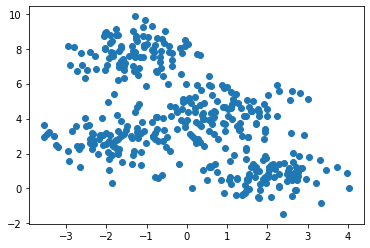

In [ ]:
plt.scatter(df['x'].values, df['y'].values)
plt.show()

# Applying 3 K-Means

[[-0.55748284  8.33463049]
 [-2.0295022   7.99930079]
 [-0.63362036  7.85638032]]


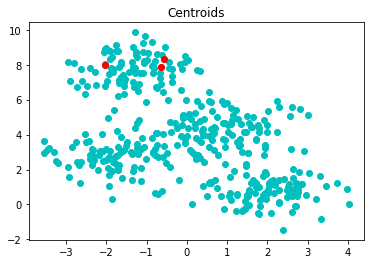

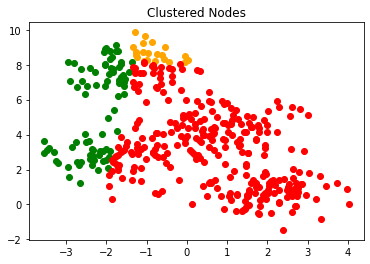

new centroids:
 [[-0.82039922  8.68992809]
 [-2.22965944  5.42308364]
 [ 0.64927415  3.19252449]]


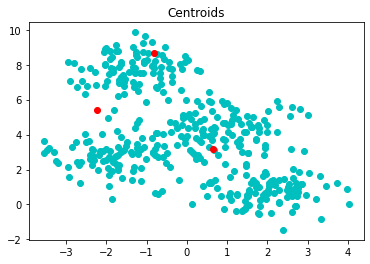

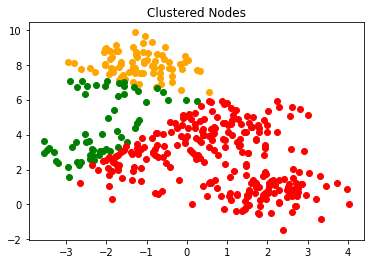

new centroids:
 [[-1.17989787  8.0092045 ]
 [-2.10035975  4.46418695]
 [ 0.80876253  2.57179207]]


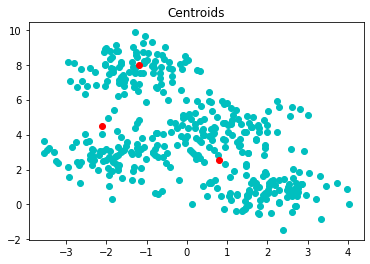

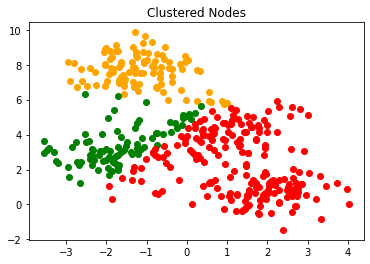

new centroids:
 [[-1.14465914  7.66699287]
 [-1.70211706  3.43214143]
 [ 1.27470721  2.30322766]]


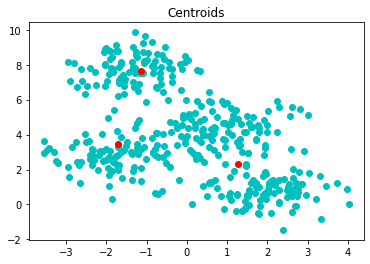

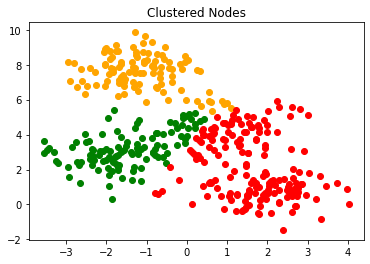

new centroids:
 [[-1.11065839  7.56531523]
 [-1.46006687  3.21675369]
 [ 1.58352177  2.16967141]]


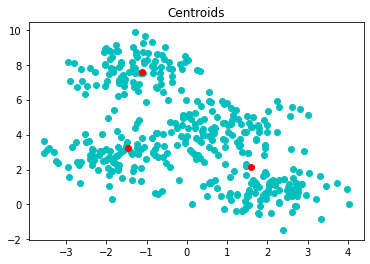

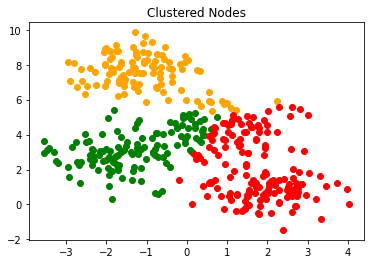

new centroids:
 [[-1.05937574  7.53122404]
 [-1.27853213  3.20848003]
 [ 1.72059574  2.0343833 ]]


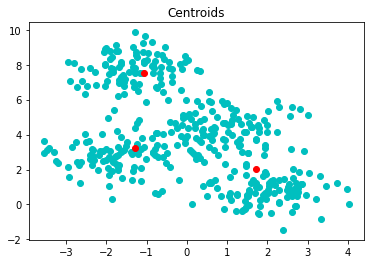

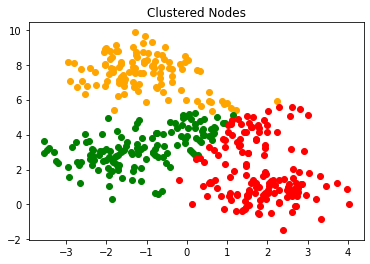

new centroids:
 [[-1.06604426  7.51242819]
 [-1.12081453  3.26024522]
 [ 1.79841706  1.88453071]]


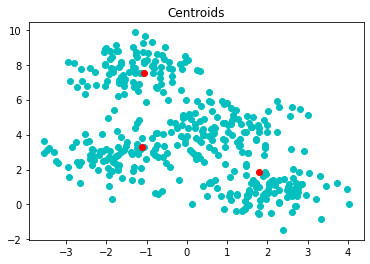

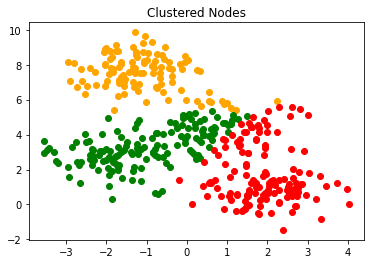

new centroids:
 [[-1.0813561   7.5319738 ]
 [-0.97287513  3.3326778 ]
 [ 1.86140836  1.72237668]]


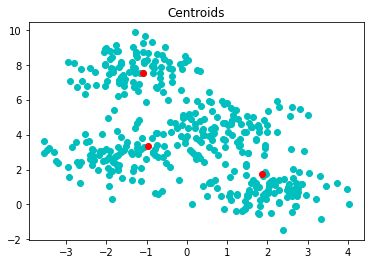

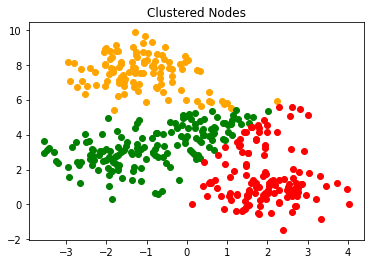

new centroids:
 [[-1.10236636  7.55107161]
 [-0.84187691  3.38016675]
 [ 1.91334286  1.56858895]]


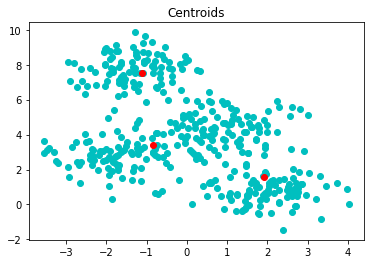

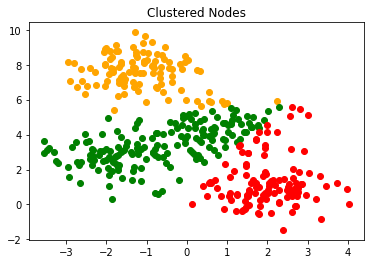

new centroids:
 [[-1.12255969  7.56952254]
 [-0.66129329  3.44090638]
 [ 1.96750432  1.29543123]]


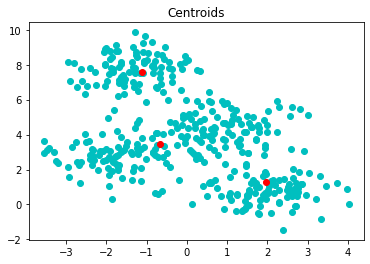

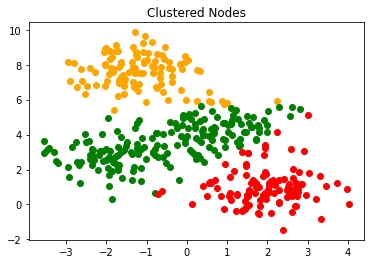

new centroids:
 [[-1.13617267  7.58761673]
 [-0.51159381  3.53082364]
 [ 1.91836954  1.00695217]]


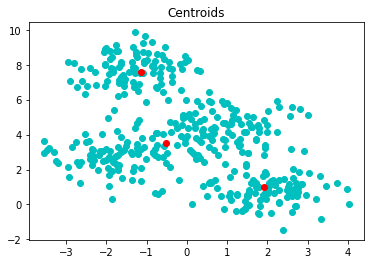

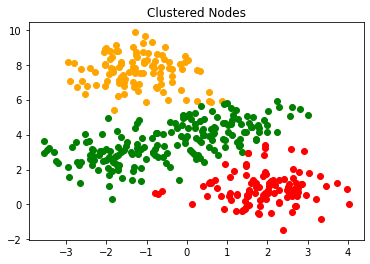

new centroids:
 [[-1.2081085   7.63776579]
 [-0.43650511  3.59154945]
 [ 1.88493756  0.91761135]]


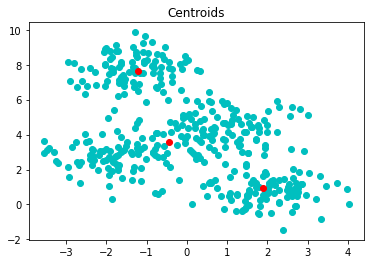

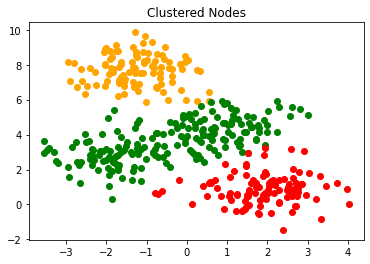

new centroids:
 [[-1.24044996  7.69349727]
 [-0.41011355  3.63205642]
 [ 1.86831758  0.87990157]]


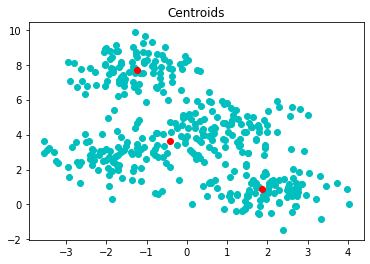

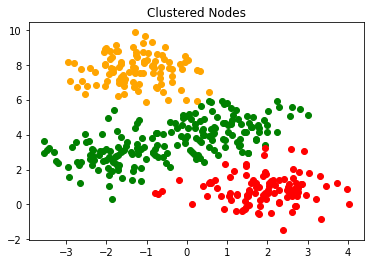

new centroids:
 [[-1.25820632  7.71082012]
 [-0.39519833  3.64035102]
 [ 1.87163125  0.86038277]]


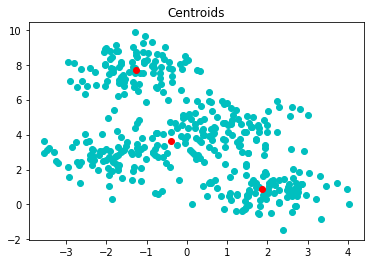

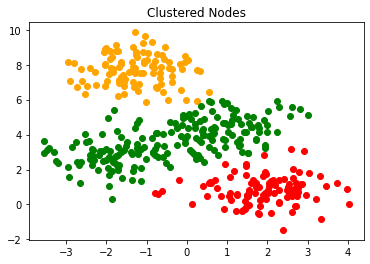

new centroids:
 [[-1.25820632  7.71082012]
 [-0.38319854  3.63837068]
 [ 1.87092808  0.83736544]]


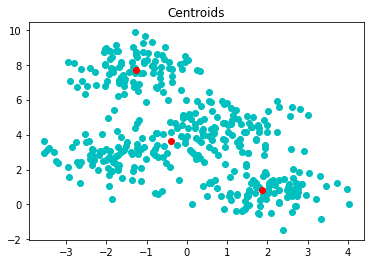

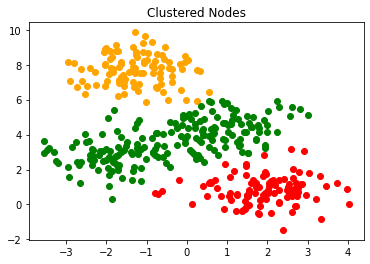

In [ ]:
k_means = K_Means(3, df)
k_means.cluster()

# Applying 4 K-Means

[[-1.67781034  7.1420372 ]
 [ 0.2360925   3.81176511]
 [ 0.63356967  5.34286564]
 [ 1.29623178  3.36929666]]


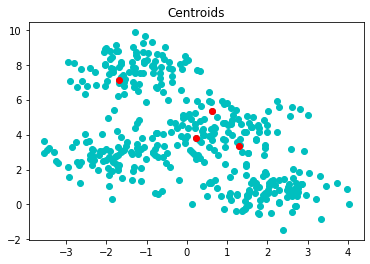

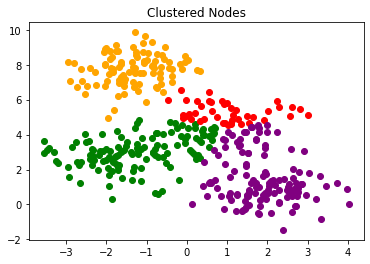

new centroids:
 [[-1.33657671  7.73797458]
 [-1.22126549  3.05108714]
 [ 0.9791569   5.28342198]
 [ 1.84665759  1.48045584]]


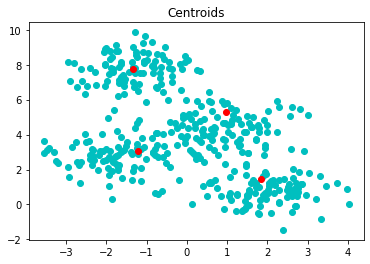

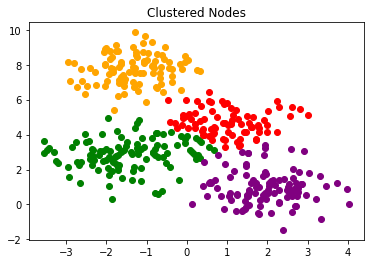

new centroids:
 [[-1.31821826  7.7541587 ]
 [-1.45407718  2.87367598]
 [ 0.97422128  4.7105998 ]
 [ 1.92882179  0.97625232]]


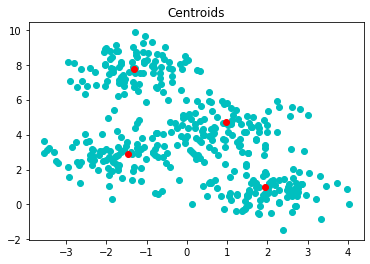

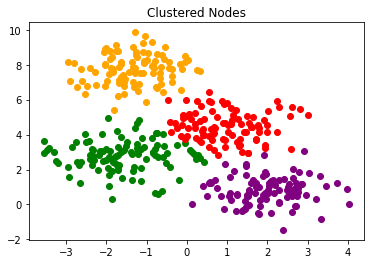

new centroids:
 [[-1.31821826  7.7541587 ]
 [-1.57510425  2.79851472]
 [ 0.9490944   4.50088858]
 [ 1.9629702   0.81335799]]


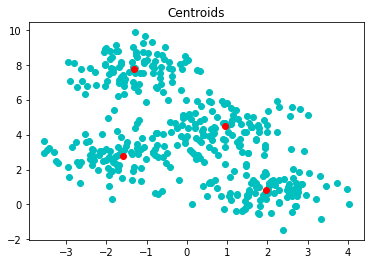

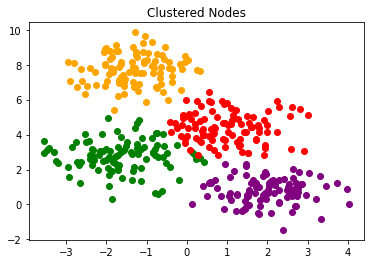

new centroids:
 [[-1.3096914   7.73605555]
 [-1.62452893  2.7883443 ]
 [ 0.96694243  4.4160933 ]
 [ 1.95368286  0.76947408]]


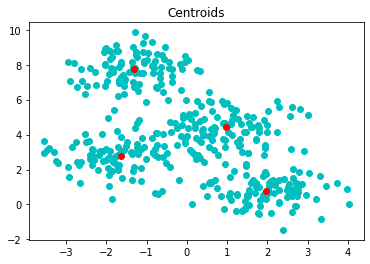

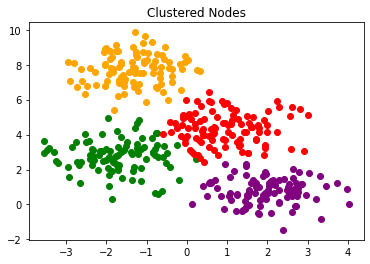

new centroids:
 [[-1.3096914   7.73605555]
 [-1.71316928  2.77786425]
 [ 0.92620184  4.34953087]
 [ 1.95368286  0.76947408]]


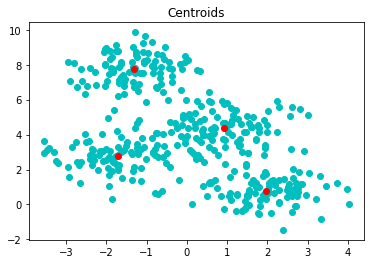

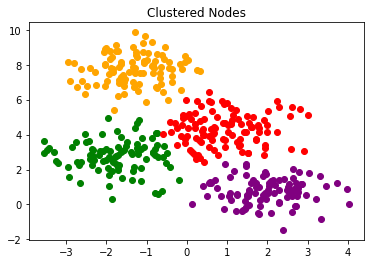

new centroids:
 [[-1.3096914   7.73605555]
 [-1.74903681  2.77310187]
 [ 0.90903371  4.32484365]
 [ 1.95368286  0.76947408]]


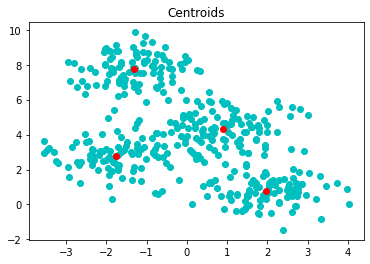

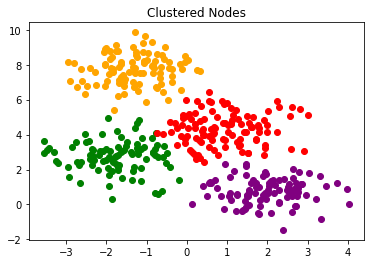

new centroids:
 [[-1.3096914   7.73605555]
 [-1.75987047  2.7587906 ]
 [ 0.89412728  4.32296653]
 [ 1.95368286  0.76947408]]


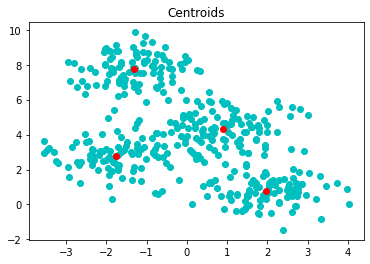

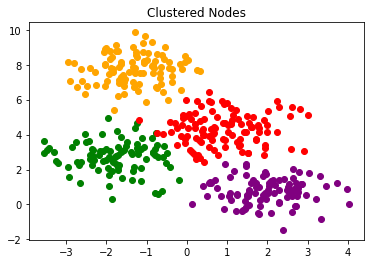

new centroids:
 [[-1.3096914   7.73605555]
 [-1.76595756  2.7362038 ]
 [ 0.87531739  4.32779894]
 [ 1.95368286  0.76947408]]


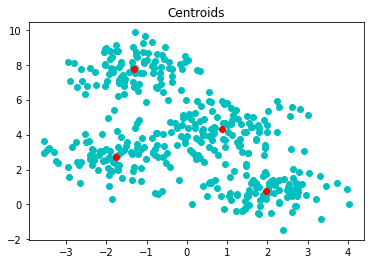

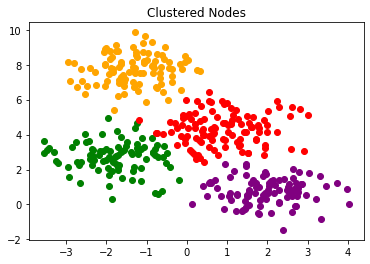

new centroids:
 [[-1.3096914   7.73605555]
 [-1.77682739  2.72152557]
 [ 0.86066337  4.32564539]
 [ 1.95368286  0.76947408]]


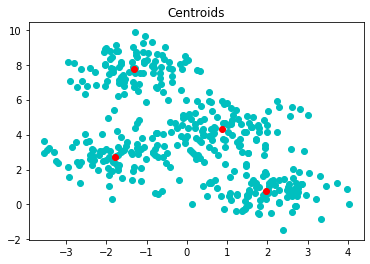

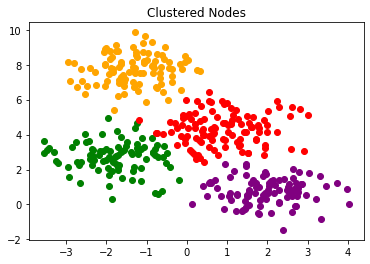

In [ ]:
k_means = K_Means(4, df)
k_means.cluster()

# Applying 5 K-Means

[[-0.17293961  8.01523248]
 [-0.45227691  7.80562912]
 [ 1.94231903  0.64454141]
 [-0.06535011  5.02149586]
 [ 1.31287578  3.37468505]]


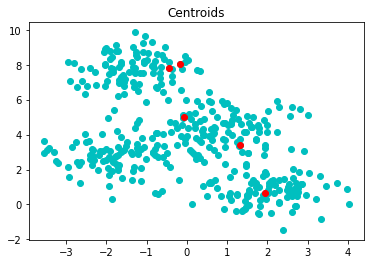

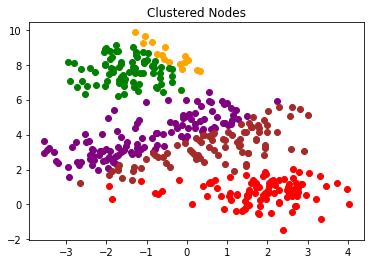

new centroids:
 [[-0.4361888   8.55061035]
 [-1.49244664  7.64760929]
 [ 1.77193292  0.72036202]
 [-0.95451923  3.92329456]
 [ 0.69219581  3.37334659]]


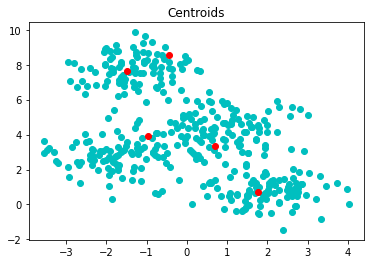

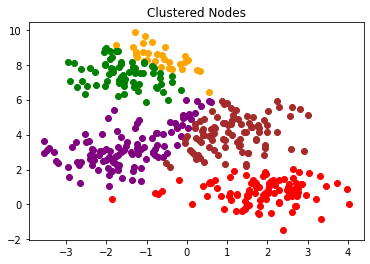

new centroids:
 [[-0.66012363  8.40798965]
 [-1.5711522   7.4450286 ]
 [ 1.83259316  0.72276847]
 [-1.48554491  3.30456944]
 [ 1.10934093  4.05863891]]


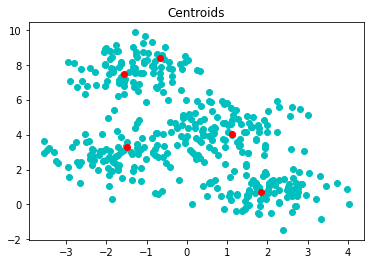

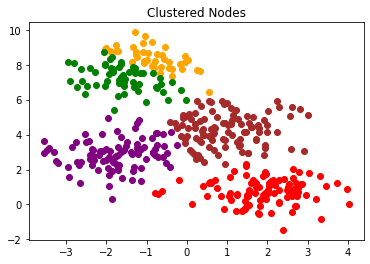

new centroids:
 [[-0.83972605  8.36939229]
 [-1.60381201  7.21392603]
 [ 1.86228041  0.75737284]
 [-1.75587021  2.8890586 ]
 [ 0.95930517  4.28343572]]


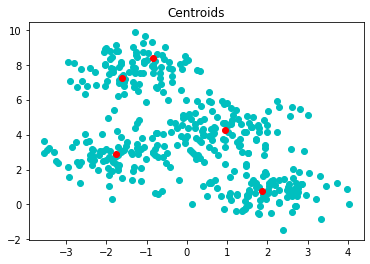

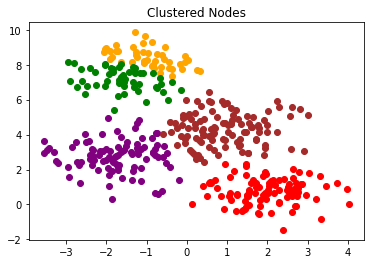

new centroids:
 [[-0.95839473  8.41341598]
 [-1.6145904   7.14815781]
 [ 1.95368286  0.76947408]
 [-1.74903681  2.77310187]
 [ 0.90903371  4.32484365]]


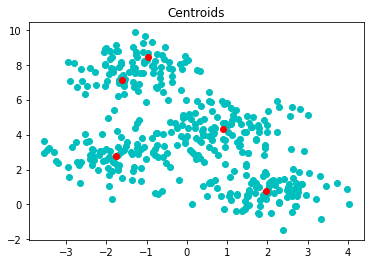

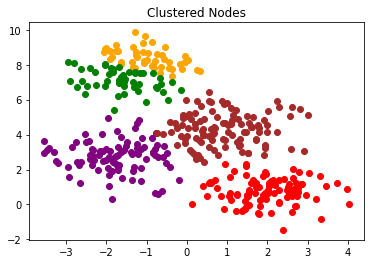

new centroids:
 [[-0.98670792  8.38295021]
 [-1.62621521  7.10209878]
 [ 1.95368286  0.76947408]
 [-1.75987047  2.7587906 ]
 [ 0.89412728  4.32296653]]


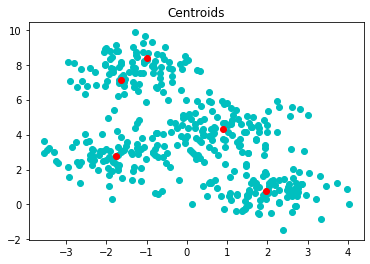

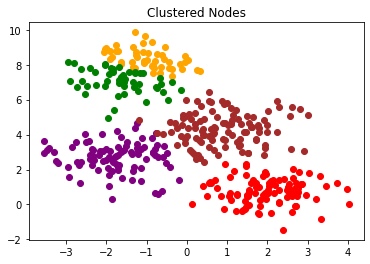

new centroids:
 [[-0.98401405  8.36570629]
 [-1.64826089  7.05105306]
 [ 1.95368286  0.76947408]
 [-1.76391038  2.71194006]
 [ 0.87531739  4.32779894]]


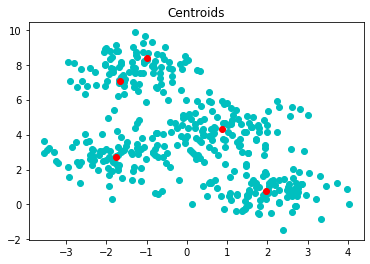

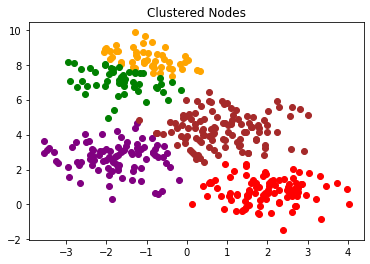

new centroids:
 [[-0.98401405  8.36570629]
 [-1.64826089  7.05105306]
 [ 1.95368286  0.76947408]
 [-1.77487716  2.69683389]
 [ 0.86066337  4.32564539]]


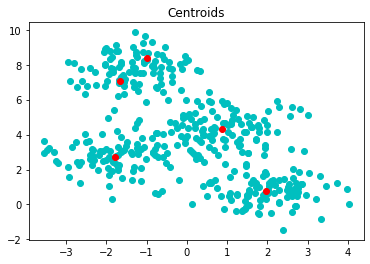

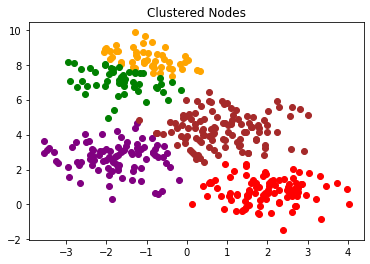

In [ ]:
k_means = K_Means(5, df)
k_means.cluster()

# Applygin 6 K-Means

[[-1.54256781  7.16001914]
 [-1.73262087  4.20840426]
 [ 0.40942969  1.05812547]
 [ 0.89258543  3.73983078]
 [ 0.64704228  4.04682999]
 [ 0.5529425   5.94388957]]


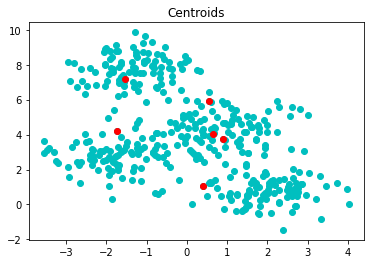

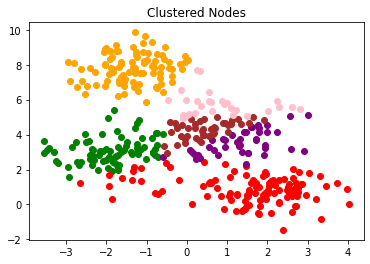

new centroids:
 [[-1.35948244  7.79309696]
 [-1.88908404  3.09166487]
 [ 1.49471763  0.86243729]
 [ 1.33590915  3.54843009]
 [ 0.46201531  4.29584023]
 [ 0.77841105  5.72943787]]


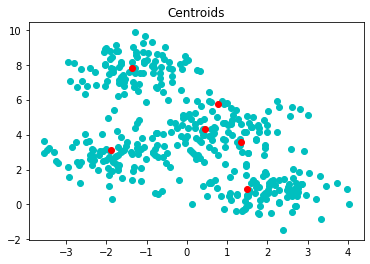

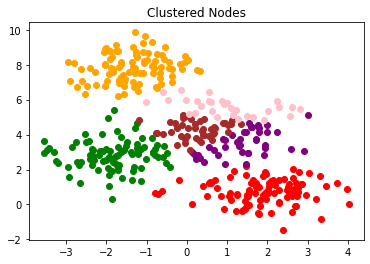

new centroids:
 [[-1.33646934  7.82596698]
 [-1.83078531  2.83596705]
 [ 1.86620386  0.74170709]
 [ 1.37442534  3.50846868]
 [ 0.24296476  4.30497306]
 [ 0.96056704  5.59030682]]


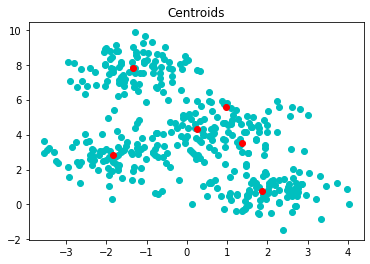

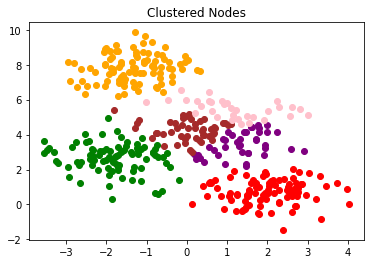

new centroids:
 [[-1.32862719  7.81119998]
 [-1.81255921  2.66151186]
 [ 1.97469824  0.72148984]
 [ 1.35394695  3.43620061]
 [ 0.04619099  4.28514271]
 [ 1.13635957  5.4773041 ]]


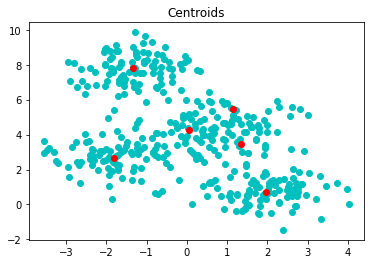

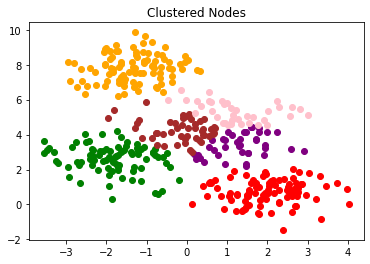

new centroids:
 [[-1.32862719  7.81119998]
 [-1.83189494  2.61203699]
 [ 1.97469824  0.72148984]
 [ 1.30865324  3.38380977]
 [-0.16598491  4.28111071]
 [ 1.21523075  5.30818232]]


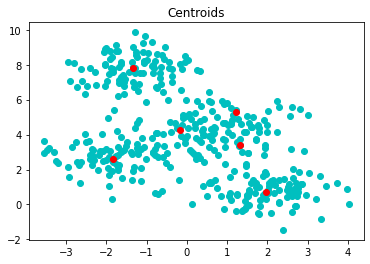

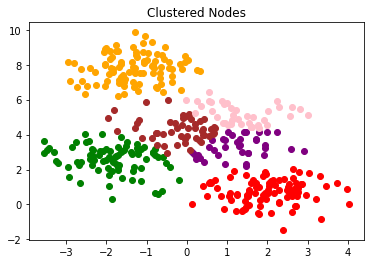

new centroids:
 [[-1.31640367  7.79810947]
 [-1.84930946  2.58845458]
 [ 1.97469824  0.72148984]
 [ 1.24759829  3.29082359]
 [-0.21474102  4.31229516]
 [ 1.32847242  5.18957206]]


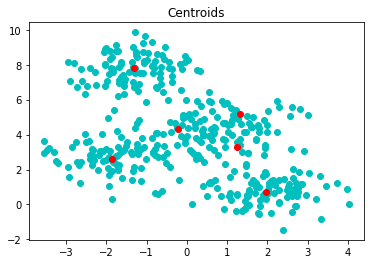

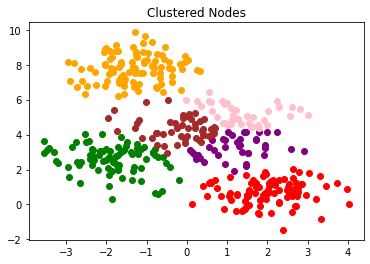

new centroids:
 [[-1.31640367  7.79810947]
 [-1.84930946  2.58845458]
 [ 1.9833853   0.70852589]
 [ 1.21571638  3.2508816 ]
 [-0.21247884  4.35457907]
 [ 1.35815929  5.18789629]]


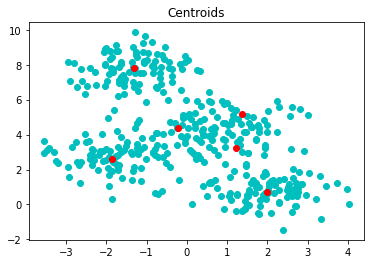

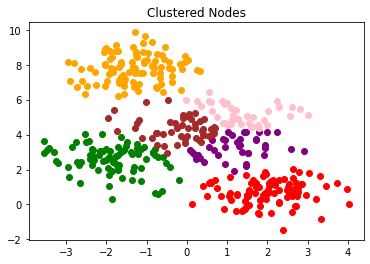

In [ ]:
k_means = K_Means(6, df)
k_means.cluster()

# Applying 7 K-Means

[[-1.56575238  3.10531377]
 [ 2.24623729  4.1294028 ]
 [ 0.32389678  7.65341836]
 [ 1.21758339 -0.3533961 ]
 [-0.7339037   8.5966826 ]
 [-1.36037812  8.17950756]
 [ 0.95559287  3.67646105]]


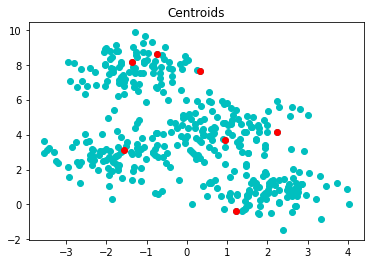

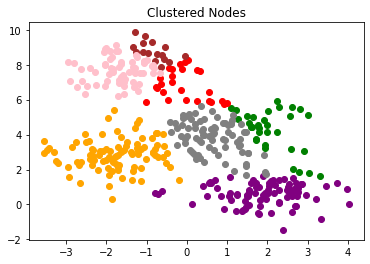

new centroids:
 [[-1.77049958  2.88191095]
 [ 2.09449078  4.24537316]
 [-0.06330669  6.82986328]
 [ 1.85526986  0.60720144]
 [-0.83159247  8.77611342]
 [-1.69047233  7.65823383]
 [ 0.65068946  3.83818246]]


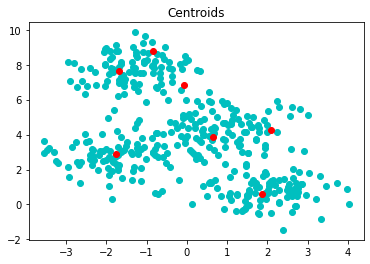

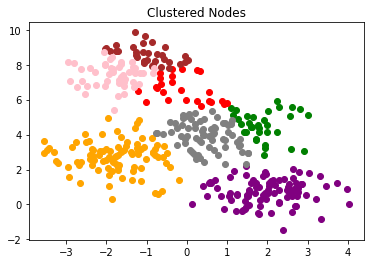

new centroids:
 [[-1.77055797  2.74451307]
 [ 1.89625807  4.52619278]
 [-0.10159244  6.59737994]
 [ 1.96935431  0.73709083]
 [-0.98514787  8.57791685]
 [-1.80745821  7.39957127]
 [ 0.45592919  3.96578522]]


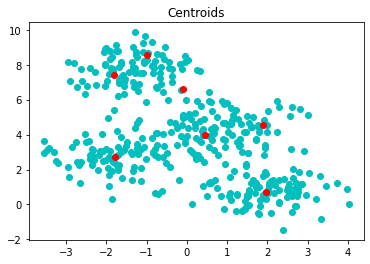

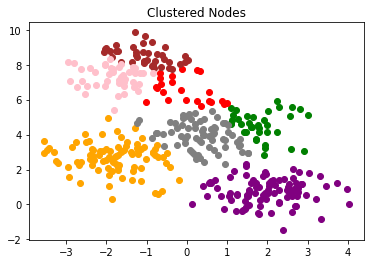

new centroids:
 [[-1.80663457  2.68103589]
 [ 1.83018276  4.54107304]
 [-0.0413781   6.55030296]
 [ 1.9641929   0.7534574 ]
 [-1.0395449   8.51768736]
 [-1.82370664  7.28440447]
 [ 0.33402304  3.96867214]]


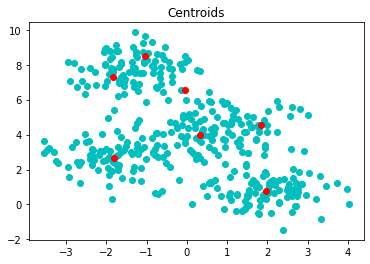

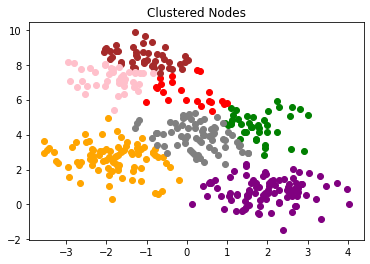

new centroids:
 [[-1.8404956   2.64915419]
 [ 1.77410166  4.52382272]
 [ 0.02158082  6.39725957]
 [ 1.9641929   0.7534574 ]
 [-1.05513769  8.43528091]
 [-1.8513455   7.21324139]
 [ 0.24672608  3.91810476]]


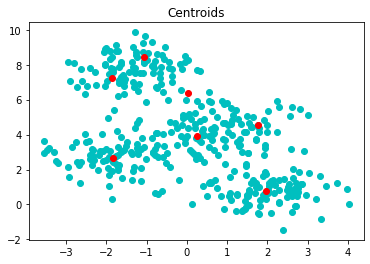

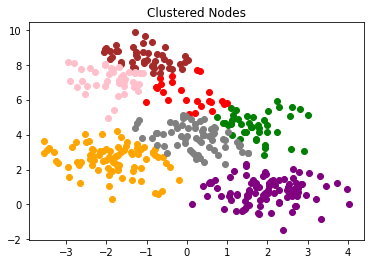

new centroids:
 [[-1.84792031  2.60773969]
 [ 1.71319163  4.52452455]
 [ 0.03088665  6.29970971]
 [ 1.9641929   0.7534574 ]
 [-1.05081592  8.41582289]
 [-1.87823047  7.15099051]
 [ 0.19904884  3.84881401]]


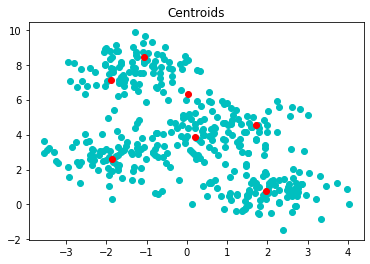

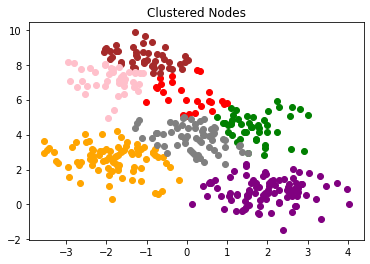

new centroids:
 [[-1.84792031  2.60773969]
 [ 1.68293273  4.45959762]
 [ 0.02398193  6.20731913]
 [ 1.9641929   0.7534574 ]
 [-1.05081592  8.41582289]
 [-1.87823047  7.15099051]
 [ 0.15536145  3.82250162]]


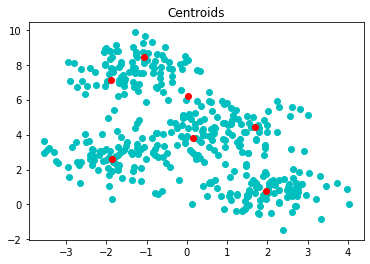

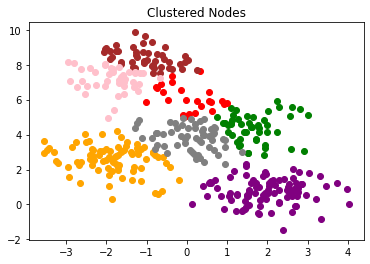

new centroids:
 [[-1.860687    2.6011676 ]
 [ 1.66351661  4.38266485]
 [ 0.03971874  6.05821173]
 [ 1.9641929   0.7534574 ]
 [-1.02385137  8.40137699]
 [-1.84966     7.15296884]
 [ 0.07995326  3.82100528]]


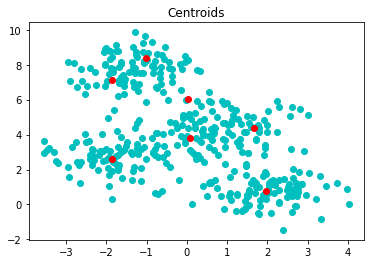

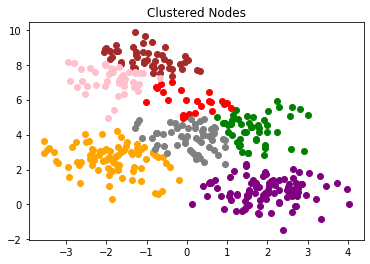

new centroids:
 [[-1.860687    2.6011676 ]
 [ 1.66921194  4.32970777]
 [ 0.08235626  5.87762593]
 [ 1.9641929   0.7534574 ]
 [-0.98401405  8.36570629]
 [-1.84966     7.15296884]
 [ 0.0598895   3.81527985]]


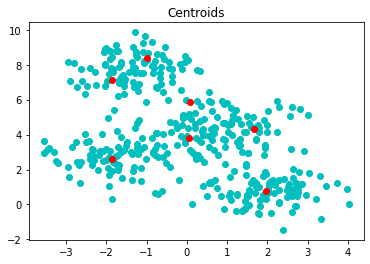

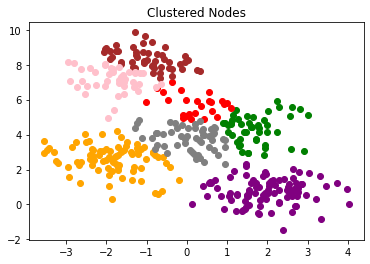

new centroids:
 [[-1.860687    2.6011676 ]
 [ 1.68880225  4.31574676]
 [ 0.18251756  5.69410929]
 [ 1.9641929   0.7534574 ]
 [-0.97801909  8.34351754]
 [-1.82354808  7.13563236]
 [ 0.05223792  3.77581062]]


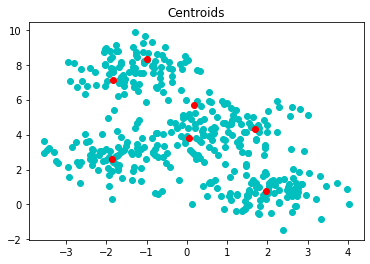

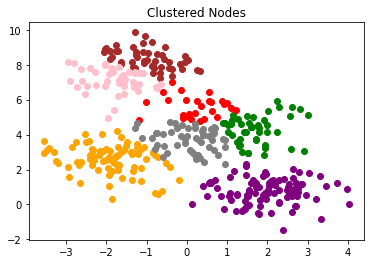

new centroids:
 [[-1.8761221   2.59973307]
 [ 1.69878116  4.29149745]
 [ 0.20826488  5.58587076]
 [ 1.9641929   0.7534574 ]
 [-0.97801909  8.34351754]
 [-1.79865193  7.12562225]
 [ 0.05844846  3.71681245]]


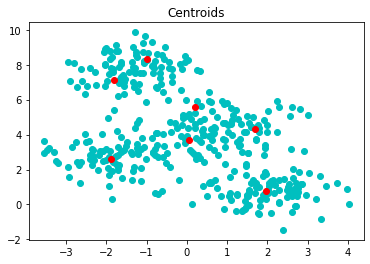

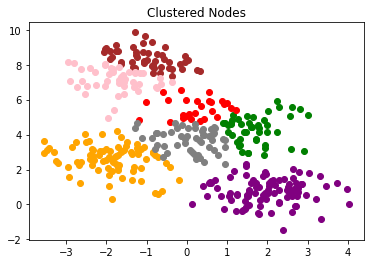

new centroids:
 [[-1.8761221   2.59973307]
 [ 1.69878116  4.29149745]
 [ 0.20682234  5.50403051]
 [ 1.9641929   0.7534574 ]
 [-0.98401405  8.36570629]
 [-1.74321659  7.12500301]
 [ 0.06744551  3.69795977]]


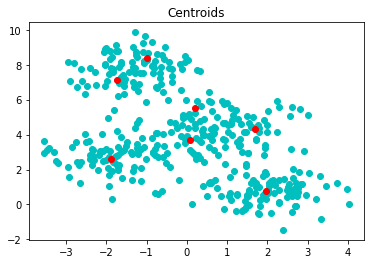

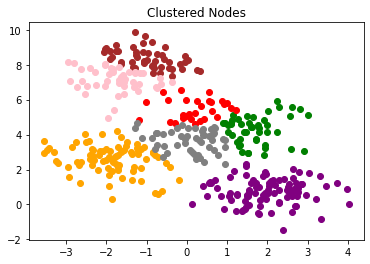

new centroids:
 [[-1.8761221   2.59973307]
 [ 1.69878116  4.29149745]
 [ 0.19049501  5.44742597]
 [ 1.9641929   0.7534574 ]
 [-0.98401405  8.36570629]
 [-1.74321659  7.12500301]
 [ 0.07166684  3.65967966]]


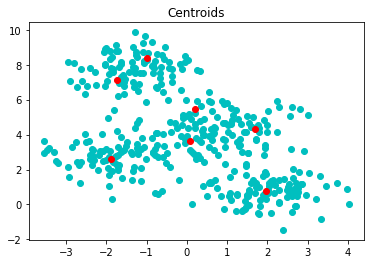

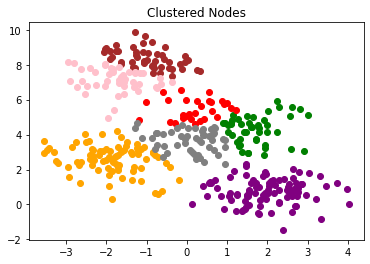

In [ ]:
k_means = K_Means(7, df)
k_means.cluster()

#  Applying 8 K-Means

[[-1.85385262  2.54062158]
 [-1.76122397  2.31461349]
 [-1.30544004  6.71482353]
 [-0.10364217  5.12777453]
 [ 0.9851951   5.82177725]
 [-1.35749885  2.87486925]
 [ 0.54208571  3.30024997]
 [ 0.71145043  4.35152787]]


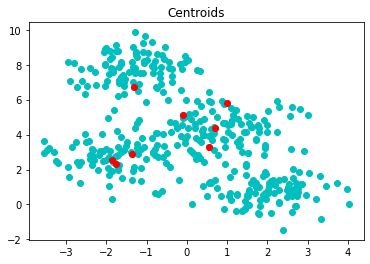

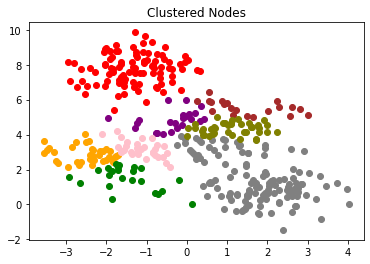

new centroids:
 [[-2.48414336  2.88128476]
 [-1.49235235  1.49764423]
 [-1.31821826  7.7541587 ]
 [-0.35466447  4.84127311]
 [ 1.47560739  5.56188682]
 [-1.13220701  3.16882027]
 [ 1.69021242  1.39338135]
 [ 1.08659117  4.33167418]]


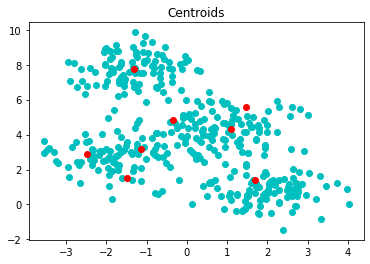

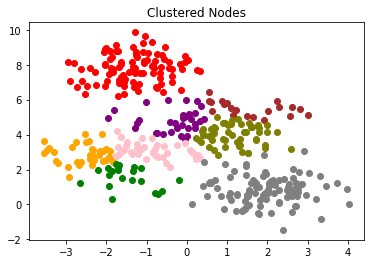

new centroids:
 [[-2.52773225  2.88180906]
 [-1.50226184  1.5634288 ]
 [-1.31640367  7.79810947]
 [-0.32760041  4.79823824]
 [ 1.55894501  5.50855777]
 [-0.88772104  3.09410265]
 [ 1.94763244  0.82936335]
 [ 1.14948312  3.98059299]]


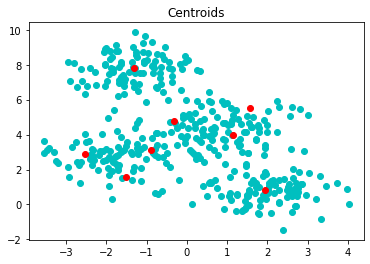

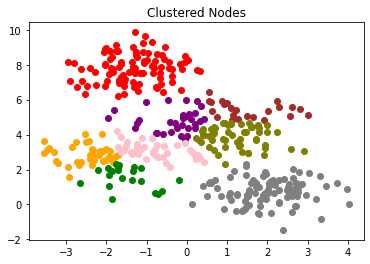

new centroids:
 [[-2.48544816  2.87717322]
 [-1.50226184  1.5634288 ]
 [-1.31640367  7.79810947]
 [-0.32760041  4.79823824]
 [ 1.4923692   5.43065083]
 [-0.81105072  3.09206525]
 [ 1.9641929   0.7534574 ]
 [ 1.19811165  3.85942107]]


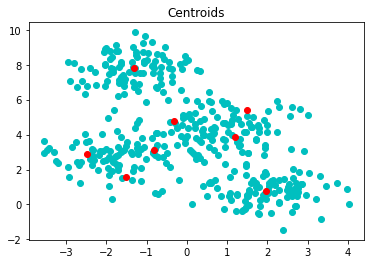

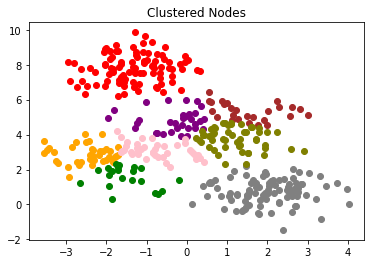

new centroids:
 [[-2.46559849  2.88792433]
 [-1.50226184  1.5634288 ]
 [-1.31640367  7.79810947]
 [-0.31390497  4.81544205]
 [ 1.5237426   5.33473052]
 [-0.76842383  3.10403066]
 [ 1.96935431  0.73709083]
 [ 1.18580361  3.77623827]]


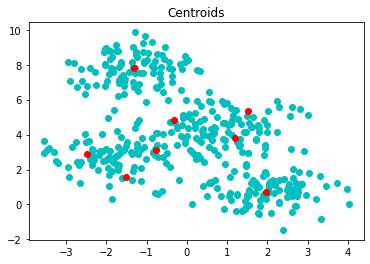

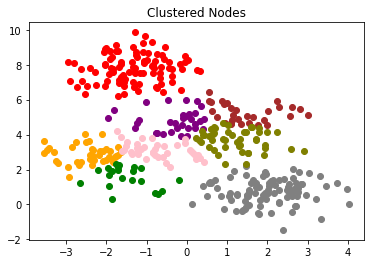

new centroids:
 [[-2.4448959   2.89066978]
 [-1.50226184  1.5634288 ]
 [-1.31640367  7.79810947]
 [-0.31390497  4.81544205]
 [ 1.47050991  5.2409659 ]
 [-0.74555353  3.10682771]
 [ 1.96935431  0.73709083]
 [ 1.19102115  3.70345039]]


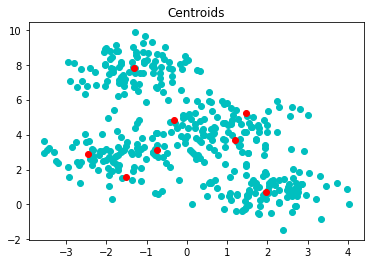

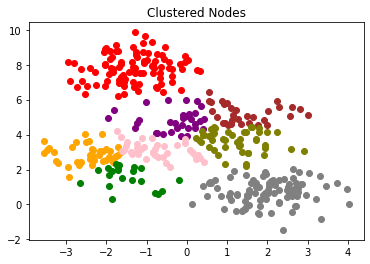

new centroids:
 [[-2.4448959   2.89066978]
 [-1.50226184  1.5634288 ]
 [-1.31640367  7.79810947]
 [-0.31390497  4.81544205]
 [ 1.43864504  5.20133318]
 [-0.74555353  3.10682771]
 [ 1.97469824  0.72148984]
 [ 1.20703643  3.63156669]]


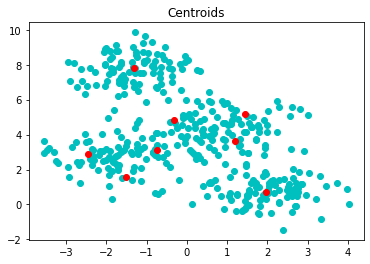

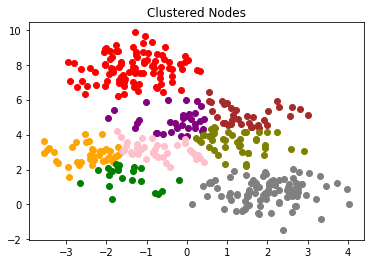

new centroids:
 [[-2.4448959   2.89066978]
 [-1.50226184  1.5634288 ]
 [-1.31640367  7.79810947]
 [-0.29332284  4.79665252]
 [ 1.45825909  5.13261433]
 [-0.74555353  3.10682771]
 [ 1.97469824  0.72148984]
 [ 1.19369908  3.56372929]]


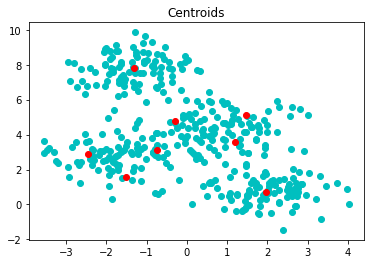

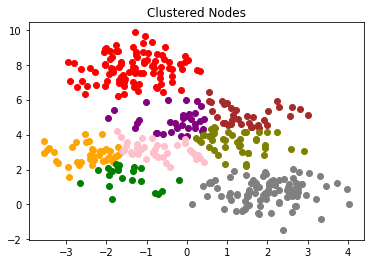

In [ ]:
k_means = K_Means(8, df)
k_means.cluster()

# Applying 9 K-Means

[[-2.34333274  2.2437325 ]
 [ 2.6489561   0.90086892]
 [-1.22535997  3.44223583]
 [-1.56713082  6.79319325]
 [ 0.3858874   4.17659797]
 [-0.76884852  6.74359056]
 [ 1.01516482  4.14468105]
 [-0.7936974   0.66060603]
 [ 0.63356967  5.34286564]]


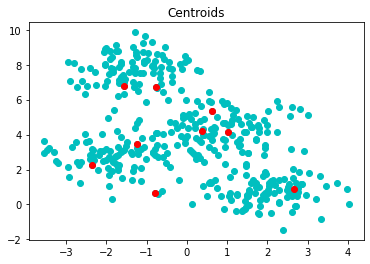

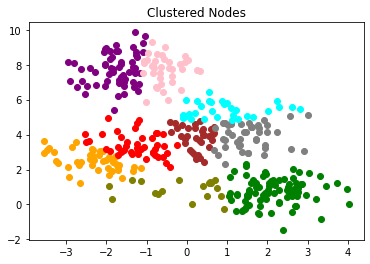

new centroids:
 [[-2.32295465  2.50746818]
 [ 2.12300489  0.7493839 ]
 [-1.24795767  3.39952167]
 [-1.76698331  7.73456187]
 [ 0.22155215  3.83909711]
 [-0.57561755  7.73845329]
 [ 1.52051722  3.90733966]
 [-0.14658541  0.85731906]
 [ 0.90150381  5.4116413 ]]


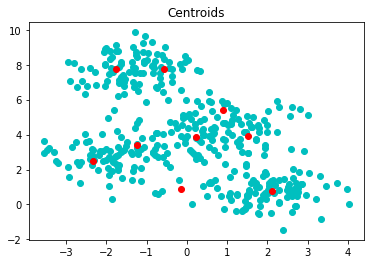

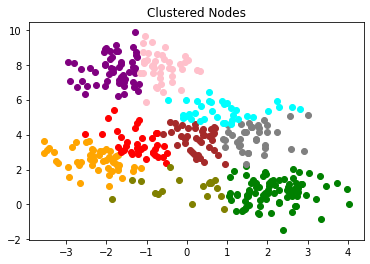

new centroids:
 [[-2.29329837  2.55238498]
 [ 2.13064191  0.73104392]
 [-1.21571039  3.48903948]
 [-1.81443381  7.70018471]
 [ 0.24295195  3.73910578]
 [-0.62855722  7.88466147]
 [ 1.65907491  3.86343862]
 [-0.06215202  0.91960623]
 [ 0.86019918  5.3263877 ]]


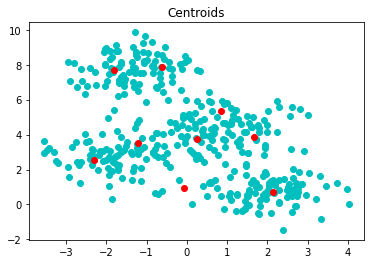

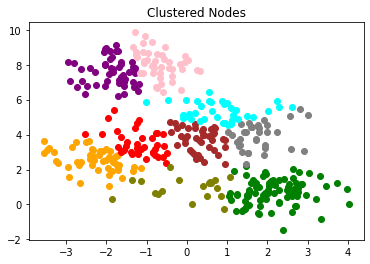

new centroids:
 [[-2.29329837e+00  2.55238498e+00]
 [ 2.14323869e+00  7.21155375e-01]
 [-1.19970915e+00  3.50268465e+00]
 [-1.86737343e+00  7.58077281e+00]
 [ 3.13606006e-01  3.72027132e+00]
 [-6.91971270e-01  8.04442435e+00]
 [ 1.77932878e+00  3.91622843e+00]
 [-2.43284181e-03  9.53399698e-01]
 [ 7.64230840e-01  5.31737769e+00]]


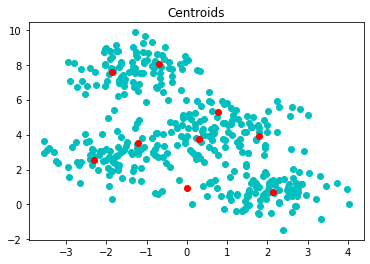

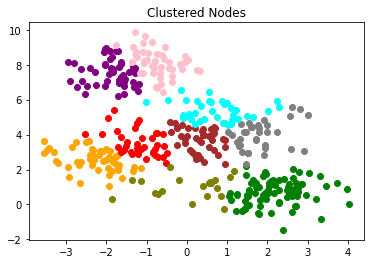

new centroids:
 [[-2.29329837  2.55238498]
 [ 2.15500298  0.70662547]
 [-1.19970915  3.50268465]
 [-1.87993576  7.53642937]
 [ 0.31606807  3.69746175]
 [-0.74136371  8.10389041]
 [ 1.80378296  3.96464009]
 [ 0.05602891  1.00208657]
 [ 0.67922962  5.32526393]]


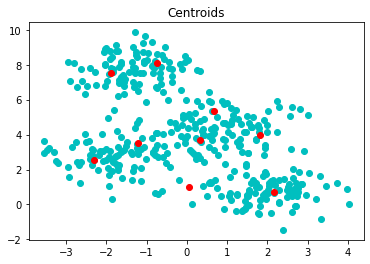

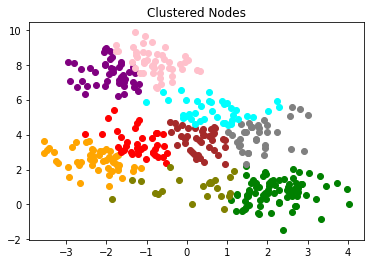

new centroids:
 [[-2.29329837  2.55238498]
 [ 2.18208636  0.71050407]
 [-1.19970915  3.50268465]
 [-1.89932353  7.4760205 ]
 [ 0.31606807  3.69746175]
 [-0.79706741  8.16133237]
 [ 1.80378296  3.96464009]
 [ 0.14712868  0.9609462 ]
 [ 0.64746225  5.35270987]]


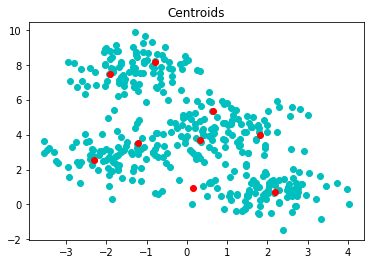

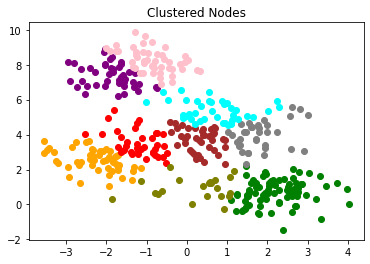

new centroids:
 [[-2.27501987  2.52985888]
 [ 2.18208636  0.71050407]
 [-1.19970915  3.50268465]
 [-1.85781064  7.37259803]
 [ 0.31606807  3.69746175]
 [-0.85768651  8.24232623]
 [ 1.80378296  3.96464009]
 [ 0.21894884  0.93986965]
 [ 0.64746225  5.35270987]]


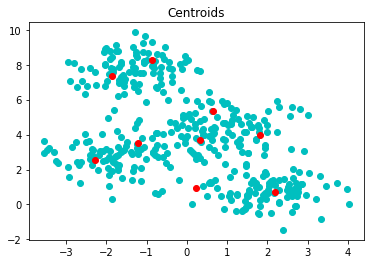

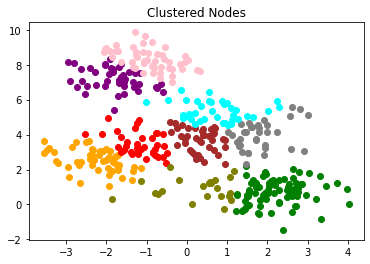

new centroids:
 [[-2.27501987  2.52985888]
 [ 2.19564412  0.71592802]
 [-1.18374756  3.45206875]
 [-1.78259775  7.19651984]
 [ 0.31606807  3.69746175]
 [-0.93743008  8.30679792]
 [ 1.80378296  3.96464009]
 [ 0.25888142  0.90972046]
 [ 0.67922962  5.32526393]]


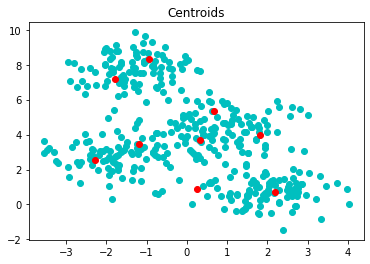

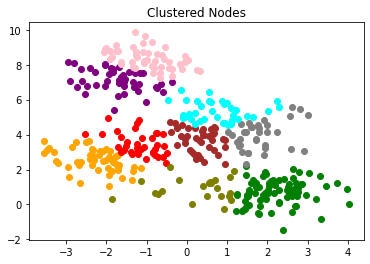

new centroids:
 [[-2.27501987  2.52985888]
 [ 2.19564412  0.71592802]
 [-1.18374756  3.45206875]
 [-1.72067927  7.12681841]
 [ 0.31606807  3.69746175]
 [-0.97801909  8.34351754]
 [ 1.80378296  3.96464009]
 [ 0.25888142  0.90972046]
 [ 0.72353532  5.31111417]]


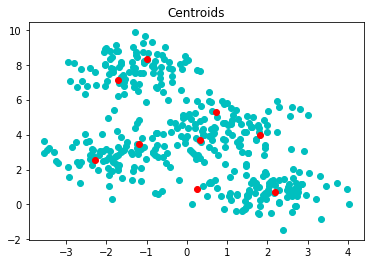

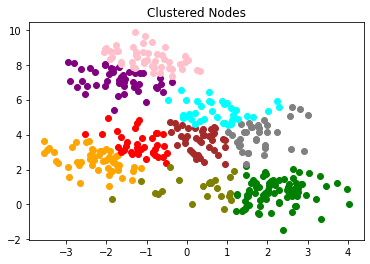

new centroids:
 [[-2.27501987  2.52985888]
 [ 2.19564412  0.71592802]
 [-1.18374756  3.45206875]
 [-1.69850037  7.12910058]
 [ 0.31606807  3.69746175]
 [-0.98401405  8.36570629]
 [ 1.80378296  3.96464009]
 [ 0.25888142  0.90972046]
 [ 0.72353532  5.31111417]]


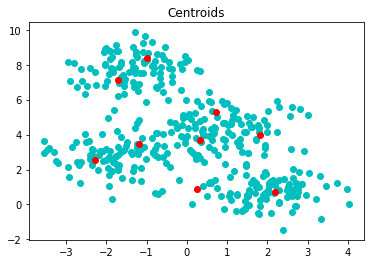

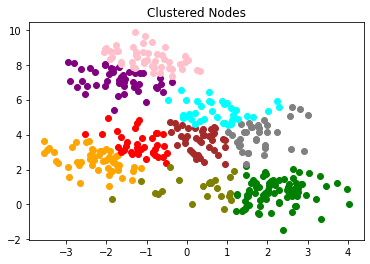

In [ ]:
k_means = K_Means(9, df)
k_means.cluster()

# Applying 10 K-Means

[[-1.89910264  8.30787894]
 [ 1.24271427  0.60357915]
 [-1.06167265  8.16956351]
 [ 2.69037761 -0.11293955]
 [-0.47405958  5.96194641]
 [-2.02855983  8.05008215]
 [ 1.44360379  0.20661962]
 [-1.84013343  7.58862248]
 [-2.65928392  1.24455128]
 [-0.61043631  0.74257529]]


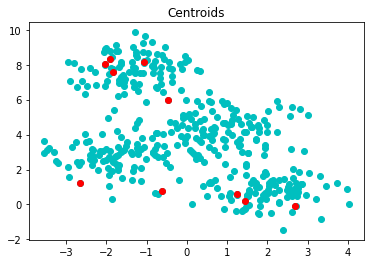

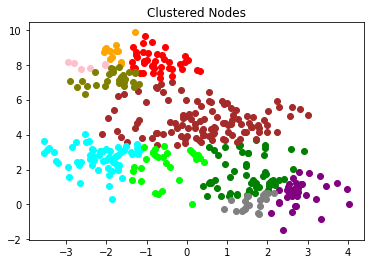

new centroids:
 [[-1.7932547   8.73648275]
 [ 1.50531708  1.72925305]
 [-0.74639552  8.1878678 ]
 [ 2.81495578  0.61216192]
 [ 0.41633652  4.77424396]
 [-2.47477668  7.97956277]
 [ 1.60476286  0.08408575]
 [-1.84538658  7.17313541]
 [-2.16440667  2.6771965 ]
 [-0.5339086   2.27212183]]


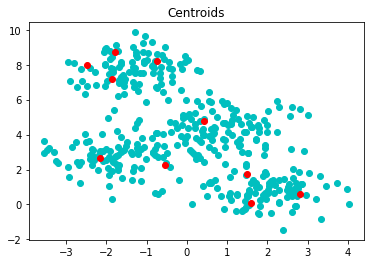

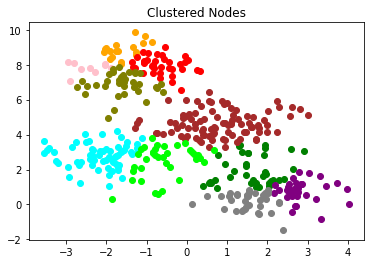

new centroids:
 [[-1.57675288  8.85016153]
 [ 1.59781214  1.91271707]
 [-0.64204215  7.97965198]
 [ 2.84493408  0.76446082]
 [ 0.7691483   4.63623196]
 [-2.43630144  7.8117889 ]
 [ 1.5239053   0.1852611 ]
 [-1.60327514  6.88887616]
 [-2.15724064  2.80041507]
 [-0.58455476  2.4851128 ]]


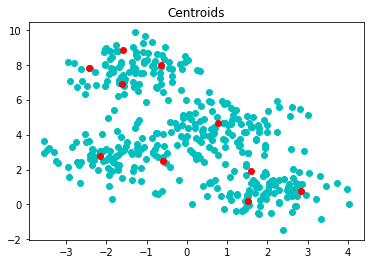

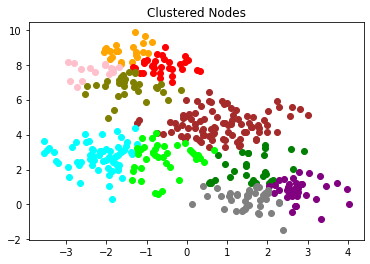

new centroids:
 [[-1.50130173  8.78760583]
 [ 1.60398625  2.02438738]
 [-0.60817632  7.94380387]
 [ 2.79268063  0.81238101]
 [ 0.83262695  4.60324825]
 [-2.30278181  7.64891805]
 [ 1.49463469  0.28458878]
 [-1.43812064  6.72823046]
 [-2.18563307  2.75913605]
 [-0.60236103  2.64896225]]


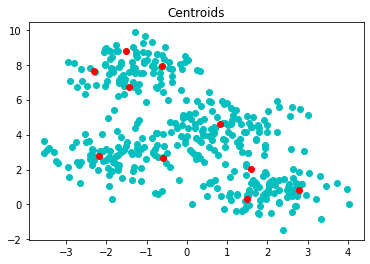

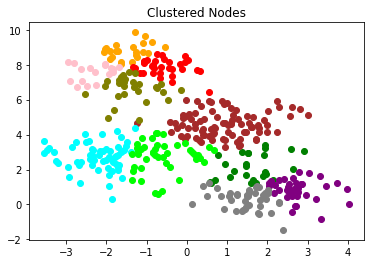

new centroids:
 [[-1.45998349  8.79646716]
 [ 1.60833662  2.10781494]
 [-0.59568781  7.85582028]
 [ 2.75248     0.83773116]
 [ 0.8961058   4.60609885]
 [-2.30984838  7.5533272 ]
 [ 1.47219124  0.30638007]
 [-1.37075039  6.62745405]
 [-2.21543986  2.74582217]
 [-0.6103452   2.7515101 ]]


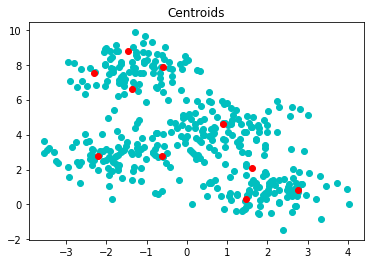

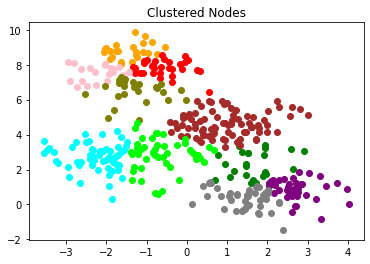

new centroids:
 [[-1.42973016  8.7881428 ]
 [ 1.6544879   2.24950502]
 [-0.61275451  7.82267612]
 [ 2.73588145  0.85274314]
 [ 0.93892454  4.61443631]
 [-2.21308884  7.52290902]
 [ 1.43196978  0.34944939]
 [-1.28773796  6.48451881]
 [-2.24575104  2.71293834]
 [-0.64199411  2.85133828]]


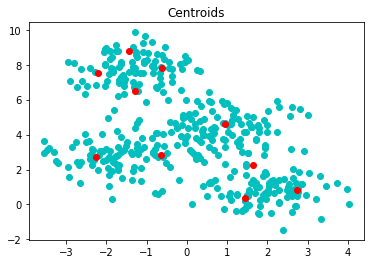

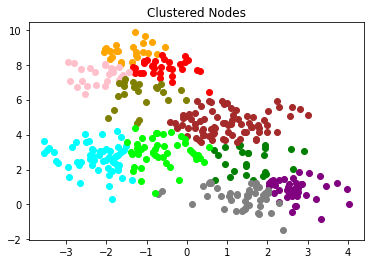

new centroids:
 [[-1.42973016  8.7881428 ]
 [ 1.57919426  2.43867722]
 [-0.61275451  7.82267612]
 [ 2.72411105  0.8339969 ]
 [ 0.96439625  4.66115823]
 [-2.14977525  7.40400102]
 [ 1.33386987  0.40490716]
 [-1.14715536  6.2996097 ]
 [-2.24343459  2.67557549]
 [-0.64323162  2.99919786]]


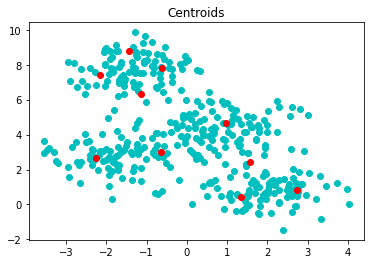

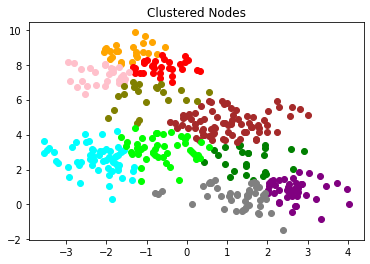

new centroids:
 [[-1.42973016  8.7881428 ]
 [ 1.56524841  2.52056809]
 [-0.64912235  7.86506559]
 [ 2.67883341  0.80989401]
 [ 0.99432885  4.66795275]
 [-2.09035532  7.36546761]
 [ 1.23304718  0.44469956]
 [-0.93602883  6.18342389]
 [-2.23496355  2.62051047]
 [-0.638507    3.16555058]]


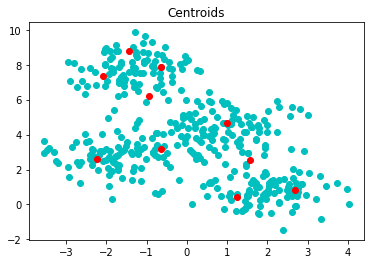

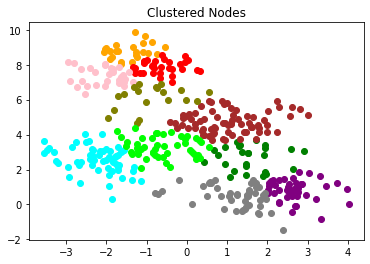

new centroids:
 [[-1.42973016  8.7881428 ]
 [ 1.55564137  2.64298353]
 [-0.64912235  7.86506559]
 [ 2.67883341  0.80989401]
 [ 1.0011019   4.72126265]
 [-2.04780092  7.33406483]
 [ 1.21215813  0.484467  ]
 [-0.88171194  6.10858158]
 [-2.22476645  2.57144493]
 [-0.62187788  3.28888358]]


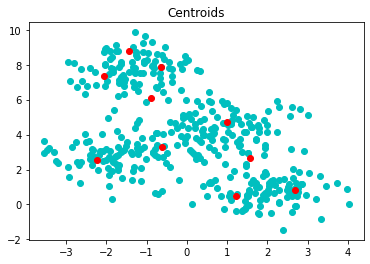

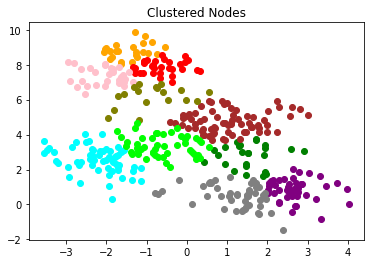

new centroids:
 [[-1.42973016  8.7881428 ]
 [ 1.53818337  2.75173291]
 [-0.64912235  7.86506559]
 [ 2.67794721  0.83833065]
 [ 1.00860241  4.73974964]
 [-2.04780092  7.33406483]
 [ 1.20936522  0.5060113 ]
 [-0.86187174  6.19040448]
 [-2.20634839  2.56341979]
 [-0.61591465  3.36447643]]


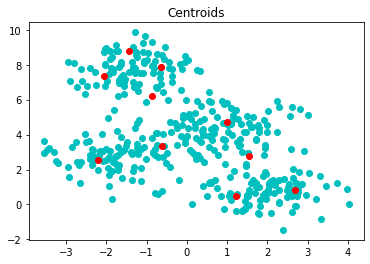

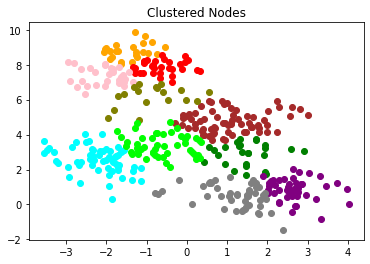

new centroids:
 [[-1.42973016  8.7881428 ]
 [ 1.48050794  2.84893292]
 [-0.64912235  7.86506559]
 [ 2.65937633  0.85710937]
 [ 1.02466535  4.75512136]
 [-2.04780092  7.33406483]
 [ 1.20936522  0.5060113 ]
 [-0.86187174  6.19040448]
 [-2.20634839  2.56341979]
 [-0.63573724  3.39357856]]


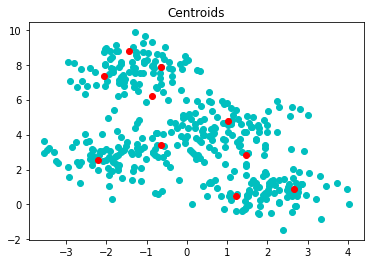

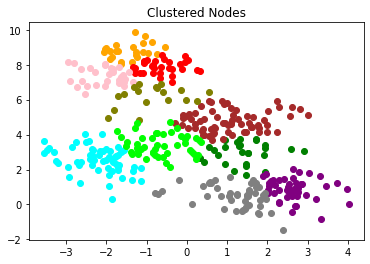

new centroids:
 [[-1.42973016  8.7881428 ]
 [ 1.4034709   2.91019007]
 [-0.64912235  7.86506559]
 [ 2.64351114  0.87773894]
 [ 1.02568112  4.77098401]
 [-2.04780092  7.33406483]
 [ 1.20936522  0.5060113 ]
 [-0.86187174  6.19040448]
 [-2.20634839  2.56341979]
 [-0.65626752  3.40934656]]


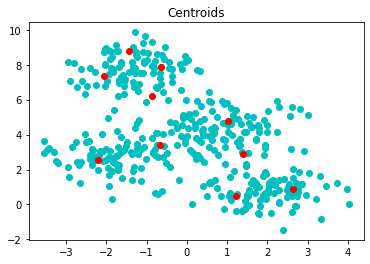

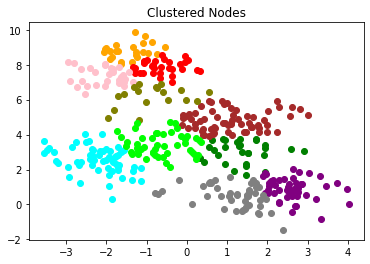

new centroids:
 [[-1.42973016  8.7881428 ]
 [ 1.34044287  3.00275371]
 [-0.64912235  7.86506559]
 [ 2.61300936  0.89301741]
 [ 1.05415901  4.8052517 ]
 [-2.04780092  7.33406483]
 [ 1.19440698  0.50318415]
 [-0.86187174  6.19040448]
 [-2.20634839  2.56341979]
 [-0.648664    3.43576163]]


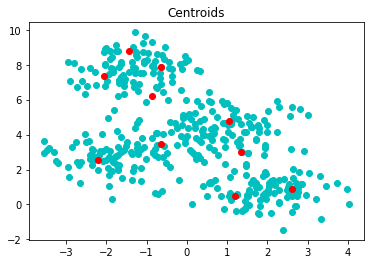

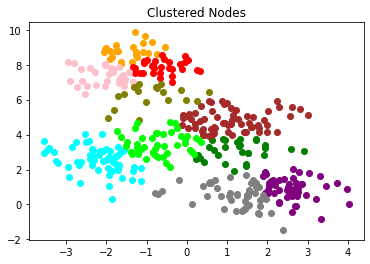

new centroids:
 [[-1.42973016  8.7881428 ]
 [ 1.24081409  3.06803305]
 [-0.64912235  7.86506559]
 [ 2.59868384  0.91367707]
 [ 1.05415901  4.8052517 ]
 [-2.04780092  7.33406483]
 [ 1.19964429  0.52710917]
 [-0.86187174  6.19040448]
 [-2.20634839  2.56341979]
 [-0.68788305  3.46652176]]


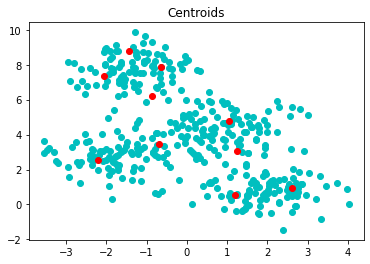

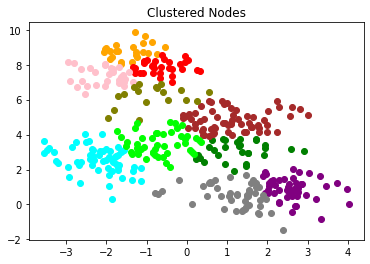

new centroids:
 [[-1.42973016  8.7881428 ]
 [ 1.24081409  3.06803305]
 [-0.64912235  7.86506559]
 [ 2.59868384  0.91367707]
 [ 1.07254678  4.80954031]
 [-2.04780092  7.33406483]
 [ 1.19964429  0.52710917]
 [-0.86187174  6.19040448]
 [-2.20634839  2.56341979]
 [-0.67585699  3.48916557]]


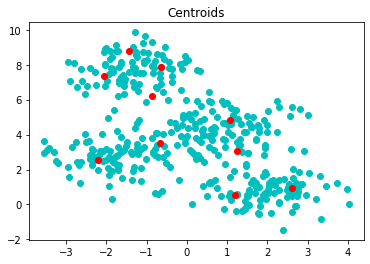

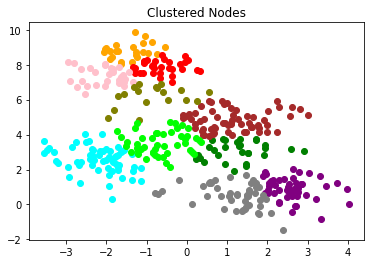

new centroids:
 [[-1.42973016  8.7881428 ]
 [ 1.24081409  3.06803305]
 [-0.64912235  7.86506559]
 [ 2.59868384  0.91367707]
 [ 1.08897539  4.81686432]
 [-2.04780092  7.33406483]
 [ 1.19964429  0.52710917]
 [-0.86187174  6.19040448]
 [-2.1922009   2.56861062]
 [-0.64617522  3.52051149]]


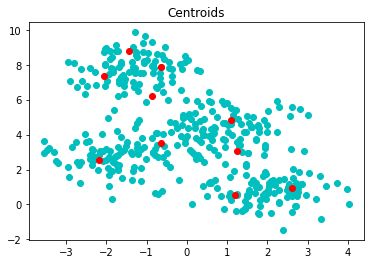

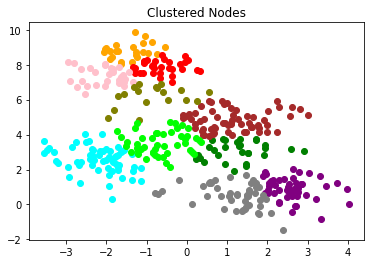

In [ ]:
k_means = K_Means(10, df)
k_means.cluster()

# Applying 11 K-Mean

[[-2.01104656  8.95105983]
 [-1.23945886  8.44748871]
 [-1.49544915  3.57059931]
 [-3.1859375   2.35697429]
 [-2.61463981  2.42026574]
 [-1.06508891  3.29106878]
 [-1.63186336  8.06129479]
 [-1.13810075  2.09796205]
 [-1.56713082  6.79319325]
 [ 2.01942179  0.65380955]
 [-0.87120896  3.79290527]]


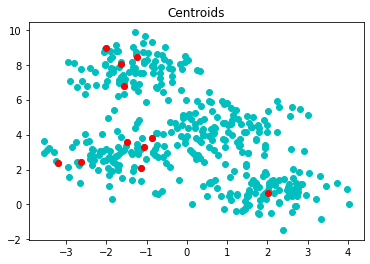

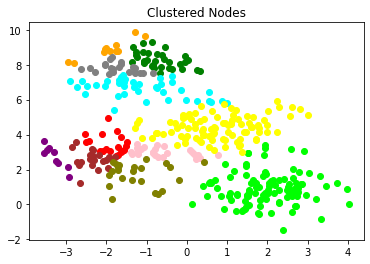

new centroids:
 [[-1.93691208  8.88855132]
 [-0.69001737  8.27960746]
 [-1.89476199  3.45690838]
 [-3.28722109  2.7294662 ]
 [-2.32056349  2.59223476]
 [-0.59050308  2.99486639]
 [-1.69642026  7.7932509 ]
 [-1.21985442  1.71865873]
 [-1.11170863  6.63336387]
 [ 1.95978623  0.92492381]
 [ 0.75923853  4.41800563]]


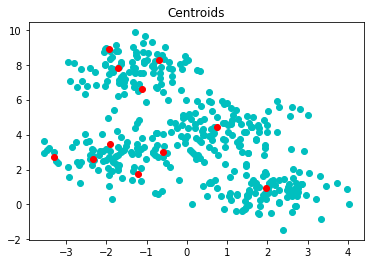

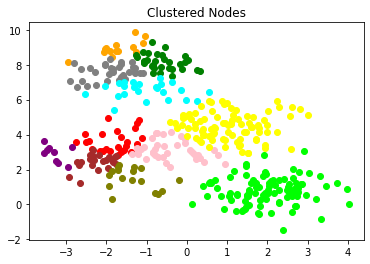

new centroids:
 [[-1.71716151  8.93574533]
 [-0.6114929   8.15895608]
 [-1.79976121  3.60949348]
 [-3.27945726  2.9169466 ]
 [-2.22843954  2.43033571]
 [-0.41363609  3.1122265 ]
 [-1.87158154  7.56122555]
 [-1.3499123   1.48350859]
 [-1.00526487  6.52793351]
 [ 1.97336051  0.79811598]
 [ 1.03210501  4.48301205]]


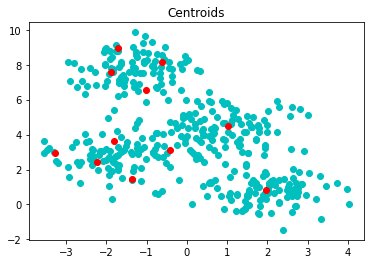

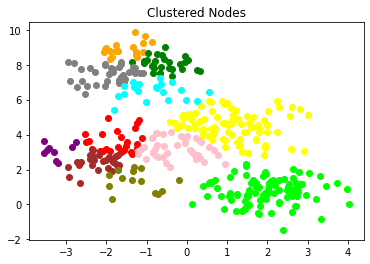

new centroids:
 [[-1.52417454  8.90366509]
 [-0.56675146  8.07477439]
 [-1.7278214   3.59766595]
 [-3.25729271  3.0764887 ]
 [-2.1831164   2.39850537]
 [-0.28258614  3.18499796]
 [-1.92399798  7.45133904]
 [-1.26323871  1.35100894]
 [-0.81584893  6.48055304]
 [ 1.9641929   0.7534574 ]
 [ 1.10777277  4.49428939]]


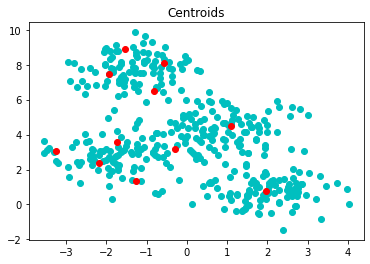

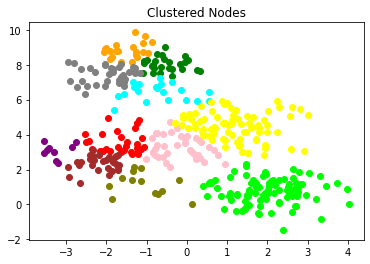

new centroids:
 [[-1.4950845   8.82219207]
 [-0.54197468  8.02887591]
 [-1.65116576  3.53043028]
 [-3.25729271  3.0764887 ]
 [-2.1579786   2.36102097]
 [-0.19305621  3.2658687 ]
 [-1.94586142  7.41015343]
 [-1.07000518  1.17174576]
 [-0.70984527  6.43808785]
 [ 1.98341558  0.76108819]
 [ 1.14891352  4.4757628 ]]


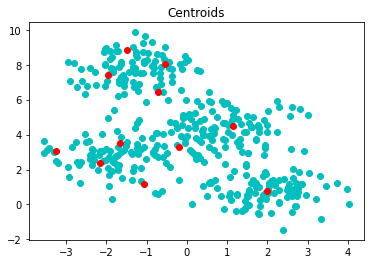

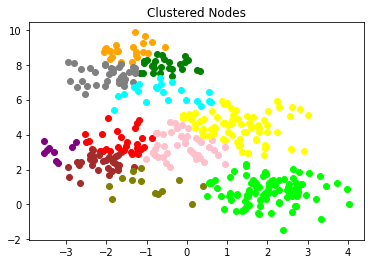

new centroids:
 [[-1.45217077  8.82988408]
 [-0.5641746   7.97412658]
 [-1.62600586  3.53889721]
 [-3.25729271  3.0764887 ]
 [-2.13008277  2.35440261]
 [-0.12556586  3.35346767]
 [-1.95119193  7.39536696]
 [-0.93688723  1.08679617]
 [-0.56694888  6.34557666]
 [ 2.00016011  0.75792822]
 [ 1.2265083   4.46660216]]


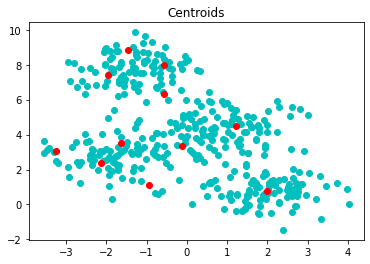

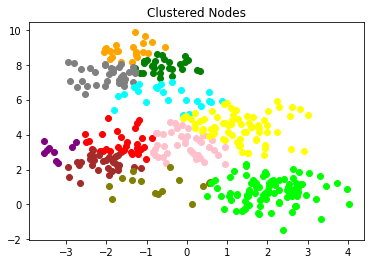

new centroids:
 [[-1.45217077  8.82988408]
 [-0.59334324  7.94378554]
 [-1.60724025  3.5098255 ]
 [-3.25729271  3.0764887 ]
 [-2.09808335  2.34613033]
 [-0.07144875  3.43006758]
 [-1.9704632   7.38245768]
 [-0.68882003  1.11193304]
 [-0.45177404  6.18599183]
 [ 2.03152478  0.74743991]
 [ 1.28923947  4.43962475]]


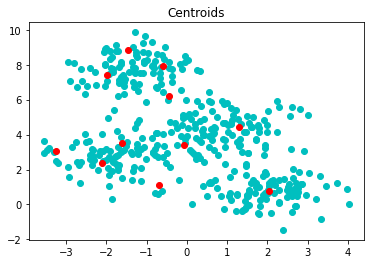

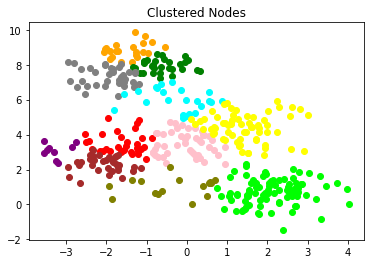

new centroids:
 [[-1.45217077  8.82988408]
 [-0.61805508  7.94072094]
 [-1.60724025  3.5098255 ]
 [-3.25729271  3.0764887 ]
 [-2.06081364  2.30687643]
 [-0.04148506  3.47819558]
 [-1.94065163  7.3061118 ]
 [-0.34723304  1.02605234]
 [-0.25650361  5.94659966]
 [ 2.07966263  0.73741289]
 [ 1.41202618  4.41325786]]


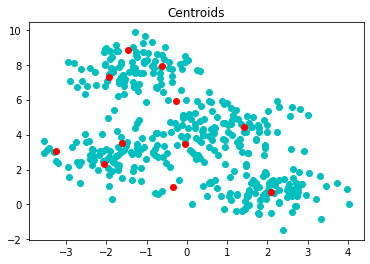

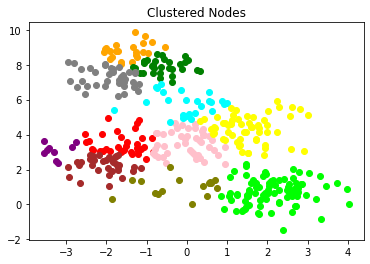

new centroids:
 [[-1.45998349e+00  8.79646716e+00]
 [-6.10021285e-01  7.91000992e+00]
 [-1.60610968e+00  3.48291439e+00]
 [-3.25729271e+00  3.07648870e+00]
 [-2.04856580e+00  2.24403968e+00]
 [ 1.60119344e-04  3.50668319e+00]
 [-1.91904330e+00  7.23716422e+00]
 [-1.80293751e-01  1.02010104e+00]
 [-3.03568450e-02  5.74686280e+00]
 [ 2.09482255e+00  7.34980806e-01]
 [ 1.50202192e+00  4.33926019e+00]]


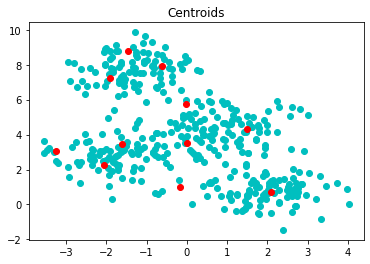

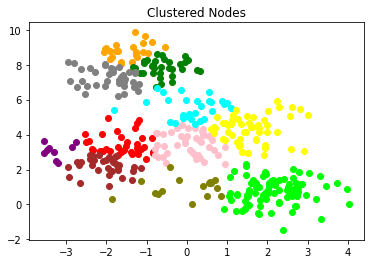

new centroids:
 [[-1.45998349  8.79646716]
 [-0.61562964  7.8439966 ]
 [-1.58710143  3.44905423]
 [-3.25729271  3.0764887 ]
 [-2.03831514  2.20098126]
 [ 0.03625533  3.47942483]
 [-1.9190433   7.23716422]
 [-0.04242434  0.96227529]
 [ 0.08262118  5.52646903]
 [ 2.10919044  0.73793068]
 [ 1.5669237   4.30461919]]


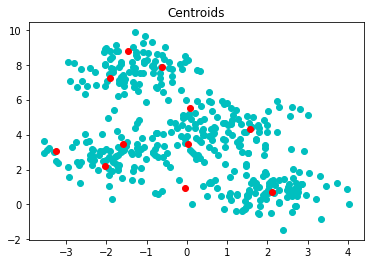

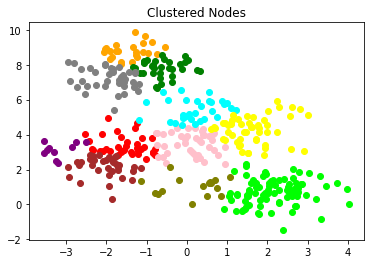

new centroids:
 [[-1.42973016  8.7881428 ]
 [-0.6154543   7.78637554]
 [-1.52824654  3.38040992]
 [-3.18113705  3.12734944]
 [-2.03308336  2.145913  ]
 [ 0.09548376  3.49296434]
 [-1.91607505  7.18950434]
 [ 0.14088485  1.03933912]
 [ 0.18039329  5.41785676]
 [ 2.12124484  0.72835218]
 [ 1.60731714  4.27317707]]


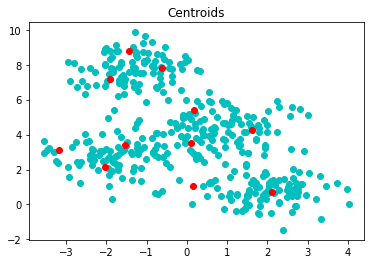

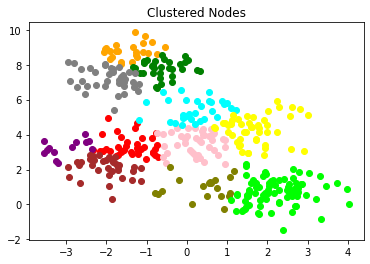

new centroids:
 [[-1.42973016  8.7881428 ]
 [-0.63553077  7.77988063]
 [-1.39702358  3.34656397]
 [-3.00894153  3.23832003]
 [-2.01519768  2.10472561]
 [ 0.20928399  3.53065055]
 [-1.93277831  7.17934099]
 [ 0.3999763   0.94978942]
 [ 0.18039329  5.41785676]
 [ 2.17344943  0.72998916]
 [ 1.65699851  4.2957728 ]]


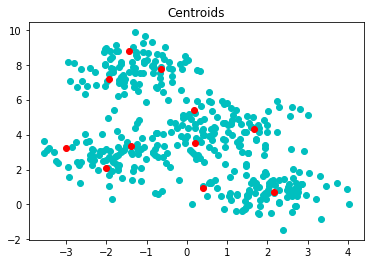

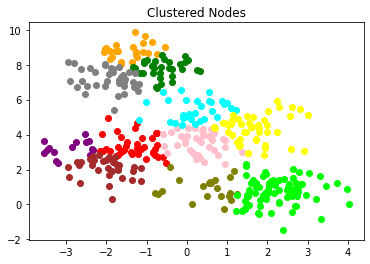

new centroids:
 [[-1.42973016  8.7881428 ]
 [-0.63553077  7.77988063]
 [-1.3130428   3.33129541]
 [-2.92253978  3.20467574]
 [-2.00377217  2.08208985]
 [ 0.30259336  3.55222382]
 [-1.93277831  7.17934099]
 [ 0.47332045  0.90124599]
 [ 0.18039329  5.41785676]
 [ 2.19853342  0.73723681]
 [ 1.66306054  4.32338541]]


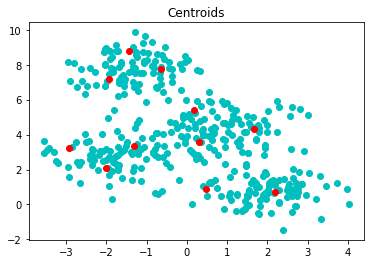

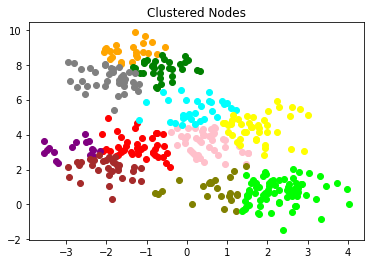

new centroids:
 [[-1.42973016  8.7881428 ]
 [-0.63553077  7.77988063]
 [-1.21697001  3.31754964]
 [-2.84130739  3.17183374]
 [-1.99396702  2.06071511]
 [ 0.49134167  3.53667234]
 [-1.93277831  7.17934099]
 [ 0.62097669  0.83294126]
 [ 0.18039329  5.41785676]
 [ 2.24304893  0.71409675]
 [ 1.72494095  4.40881411]]


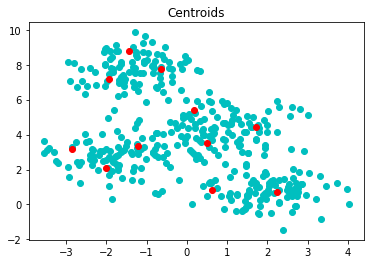

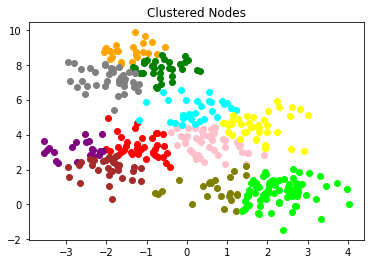

new centroids:
 [[-1.42973016  8.7881428 ]
 [-0.63553077  7.77988063]
 [-1.15826308  3.32014695]
 [-2.73369118  3.15475894]
 [-1.95619793  2.04727333]
 [ 0.55806343  3.51796907]
 [-1.93277831  7.17934099]
 [ 0.65578068  0.86904518]
 [ 0.18039329  5.41785676]
 [ 2.25353928  0.70095891]
 [ 1.74284656  4.49748264]]


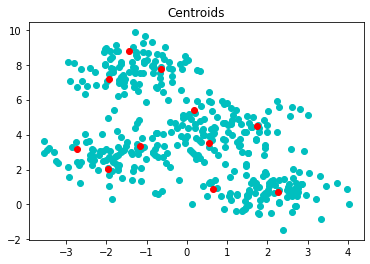

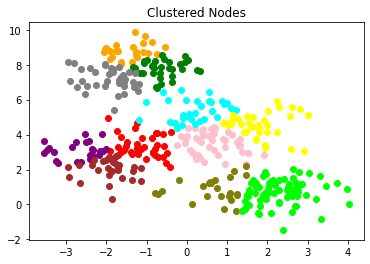

new centroids:
 [[-1.42973016  8.7881428 ]
 [-0.63553077  7.77988063]
 [-1.11684574  3.3451638 ]
 [-2.68480512  3.10158062]
 [-1.91810852  2.01464749]
 [ 0.63486551  3.51379935]
 [-1.93277831  7.17934099]
 [ 0.65578068  0.86904518]
 [ 0.16741511  5.38540915]
 [ 2.25353928  0.70095891]
 [ 1.79195856  4.54369916]]


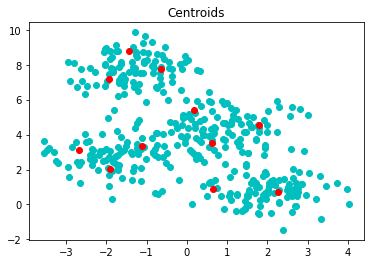

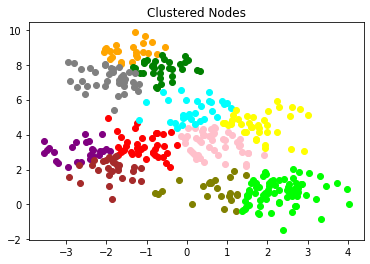

new centroids:
 [[-1.42973016  8.7881428 ]
 [-0.63553077  7.77988063]
 [-1.07429087  3.353267  ]
 [-2.66505683  3.06431582]
 [-1.88104313  2.00937573]
 [ 0.67198725  3.48805021]
 [-1.93277831  7.17934099]
 [ 0.62050918  0.81102174]
 [ 0.13314552  5.38393153]
 [ 2.25353928  0.70095891]
 [ 1.77676435  4.56768608]]


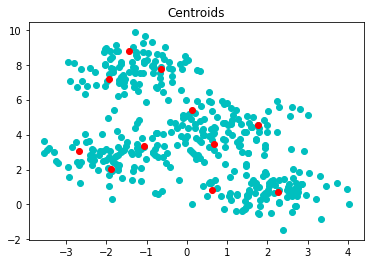

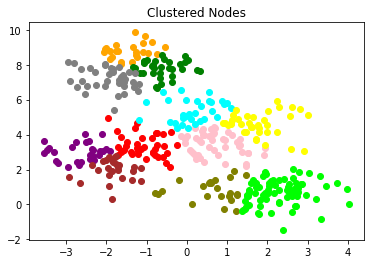

new centroids:
 [[-1.42973016  8.7881428 ]
 [-0.63553077  7.77988063]
 [-1.07429087  3.353267  ]
 [-2.65226682  3.01785602]
 [-1.83450824  1.97826013]
 [ 0.71344848  3.46426886]
 [-1.93277831  7.17934099]
 [ 0.62050918  0.81102174]
 [ 0.13015798  5.35156266]
 [ 2.25353928  0.70095891]
 [ 1.77209778  4.60417221]]


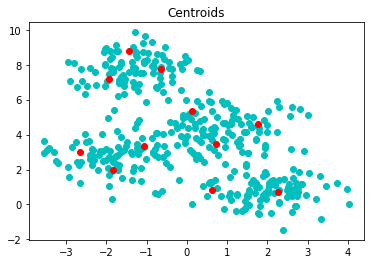

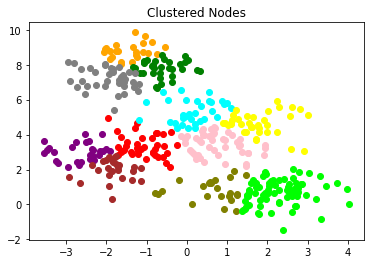

new centroids:
 [[-1.42973016  8.7881428 ]
 [-0.63553077  7.77988063]
 [-1.07429087  3.353267  ]
 [-2.65226682  3.01785602]
 [-1.83450824  1.97826013]
 [ 0.75103205  3.44335374]
 [-1.93277831  7.17934099]
 [ 0.62050918  0.81102174]
 [ 0.13242793  5.32114988]
 [ 2.25353928  0.70095891]
 [ 1.76747456  4.63898155]]


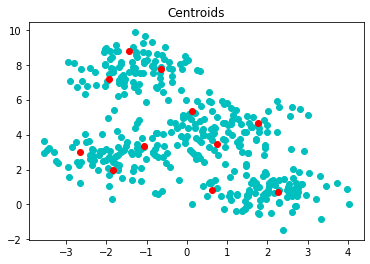

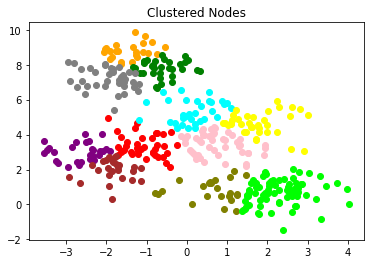

In [ ]:
k_means = K_Means(11, df)
k_means.cluster()

# Applying 12 K-Mean

[[ 1.80720576  0.25039528]
 [-1.13324323  3.15511366]
 [-0.7339037   8.5966826 ]
 [-1.9667952   2.08587688]
 [-1.62919633  7.28352278]
 [ 0.68054475  4.43668395]
 [ 0.28509574  2.83644712]
 [-1.56575238  3.10531377]
 [-0.36900737  6.98867927]
 [-1.71611884  2.14176493]
 [-2.91464336  1.5852797 ]
 [ 1.59599706  4.4134228 ]]


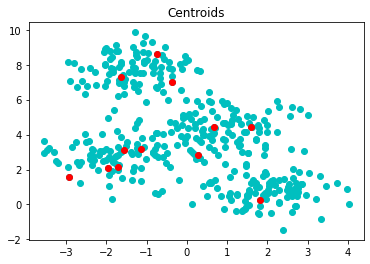

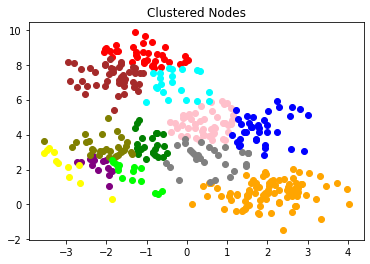

new centroids:
 [[ 2.02344211  0.68481979]
 [-0.92614396  3.43338396]
 [-1.05734781  8.5662058 ]
 [-2.20572437  2.21295519]
 [-1.84108386  7.29901516]
 [ 0.45487425  4.62367798]
 [ 0.54457278  2.64928947]
 [-2.02900812  3.31711832]
 [-0.30292874  6.89321493]
 [-1.37388995  1.73762968]
 [-3.02148146  2.25060236]
 [ 1.85059259  4.35267421]]


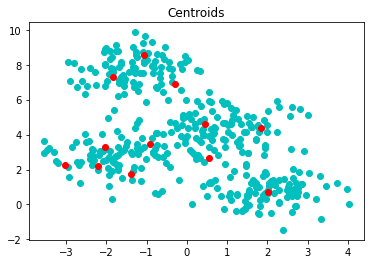

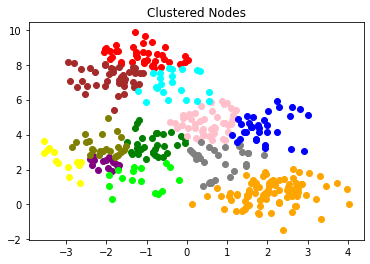

new centroids:
 [[ 2.07513187  0.66837909]
 [-0.85466533  3.45411587]
 [-1.10717061  8.53742558]
 [-2.01684715  2.37049965]
 [-1.86510645  7.25377461]
 [ 0.50023019  4.66491257]
 [ 0.81530858  2.5218668 ]
 [-2.04648984  3.34729353]
 [-0.34436171  6.87550127]
 [-1.16335699  1.46641972]
 [-3.09642512  2.53206854]
 [ 1.90191258  4.42828737]]


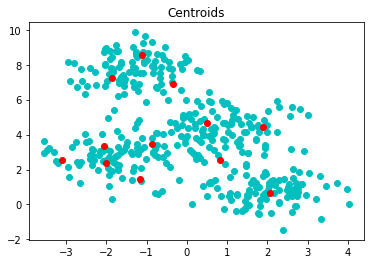

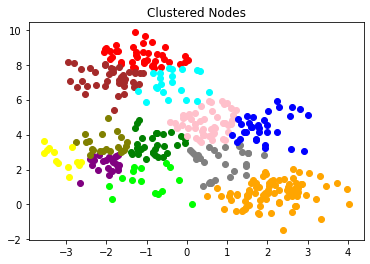

new centroids:
 [[ 2.10520191  0.66377662]
 [-0.83399488  3.45035834]
 [-1.11708313  8.50436079]
 [-1.99907668  2.34740692]
 [-1.89329992  7.22355458]
 [ 0.4981853   4.66913569]
 [ 0.85506014  2.45394254]
 [-2.01821272  3.46901863]
 [-0.38709048  6.91986373]
 [-0.98922915  1.31875235]
 [-3.1106932   2.68807253]
 [ 1.90191258  4.42828737]]


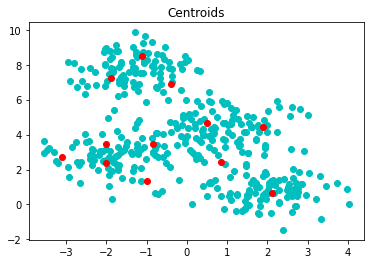

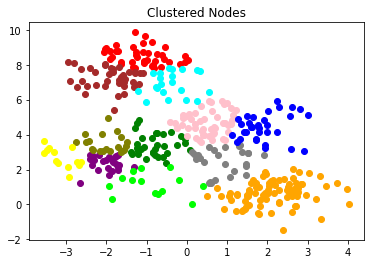

new centroids:
 [[ 2.10520191  0.66377662]
 [-0.79671435  3.40723165]
 [-1.11708313  8.50436079]
 [-1.98720959  2.36071367]
 [-1.89329992  7.22355458]
 [ 0.4981853   4.66913569]
 [ 0.90181747  2.4829036 ]
 [-1.99951137  3.49988428]
 [-0.38709048  6.91986373]
 [-0.89894083  1.16401261]
 [-3.1106932   2.68807253]
 [ 1.90191258  4.42828737]]


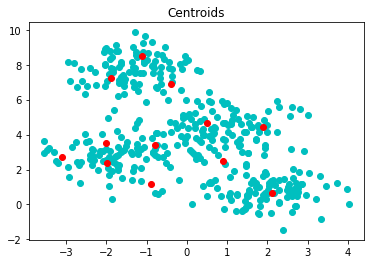

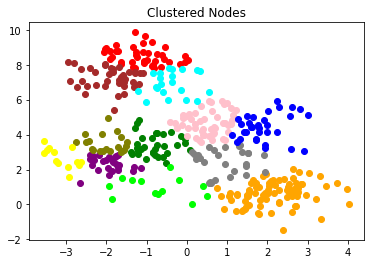

new centroids:
 [[ 2.12667221  0.65139284]
 [-0.79671435  3.40723165]
 [-1.11708313  8.50436079]
 [-1.92986834  2.33252634]
 [-1.89329992  7.22355458]
 [ 0.4981853   4.66913569]
 [ 0.94025794  2.45998204]
 [-1.99951137  3.49988428]
 [-0.38709048  6.91986373]
 [-0.73945896  0.98453889]
 [-3.1106932   2.68807253]
 [ 1.90191258  4.42828737]]


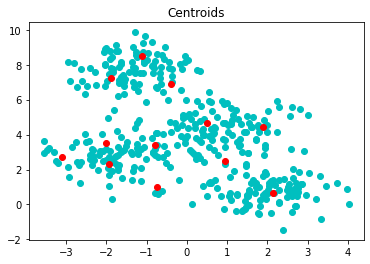

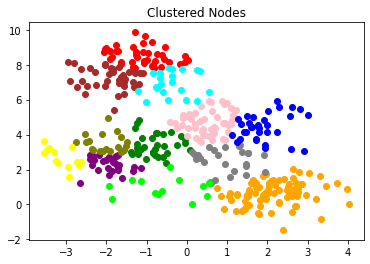

new centroids:
 [[ 2.12667221  0.65139284]
 [-0.79671435  3.40723165]
 [-1.11708313  8.50436079]
 [-1.91842211  2.3019249 ]
 [-1.89329992  7.22355458]
 [ 0.4981853   4.66913569]
 [ 0.95519056  2.50844968]
 [-1.99951137  3.49988428]
 [-0.38709048  6.91986373]
 [-0.5723182   0.96096472]
 [-3.1106932   2.68807253]
 [ 1.90191258  4.42828737]]


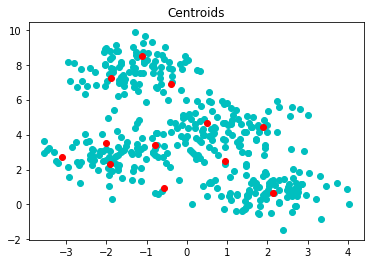

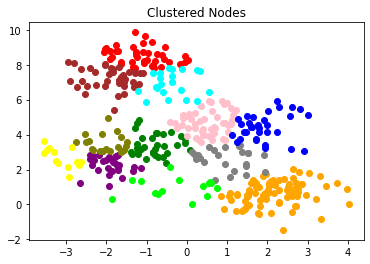

new centroids:
 [[ 2.14351468  0.64773377]
 [-0.79671435  3.40723165]
 [-1.11708313  8.50436079]
 [-1.9186727   2.25709391]
 [-1.89329992  7.22355458]
 [ 0.4981853   4.66913569]
 [ 0.98584652  2.61299507]
 [-1.99951137  3.49988428]
 [-0.38709048  6.91986373]
 [-0.23963133  0.99367537]
 [-3.1106932   2.68807253]
 [ 1.90191258  4.42828737]]


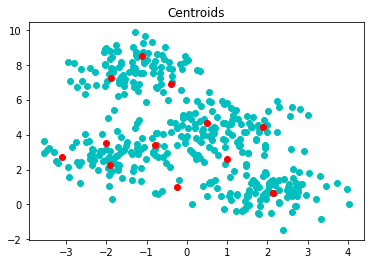

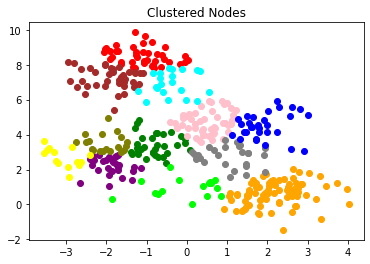

new centroids:
 [[ 2.159548    0.64982503]
 [-0.79671435  3.40723165]
 [-1.11708313  8.50436079]
 [-1.8818461   2.2053742 ]
 [-1.89329992  7.22355458]
 [ 0.48903715  4.68898918]
 [ 1.04204915  2.76168646]
 [-1.99951137  3.49988428]
 [-0.38709048  6.91986373]
 [-0.04242434  0.96227529]
 [-3.05937509  2.69976062]
 [ 1.92246881  4.49577348]]


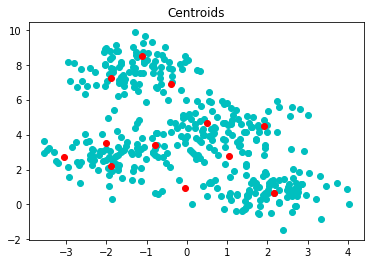

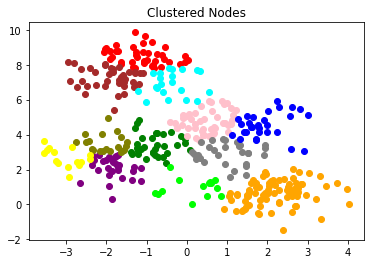

new centroids:
 [[ 2.15686705  0.6646323 ]
 [-0.79671435  3.40723165]
 [-1.11708313  8.50436079]
 [-1.83761951  2.09728658]
 [-1.89329992  7.22355458]
 [ 0.48066701  4.75403964]
 [ 0.99820641  2.9081127 ]
 [-1.99951137  3.49988428]
 [-0.38709048  6.91986373]
 [ 0.16591675  0.97893865]
 [-3.01557335  2.69447194]
 [ 1.92207426  4.53404686]]


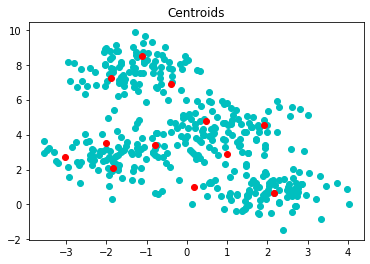

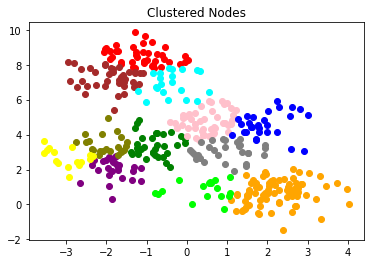

new centroids:
 [[ 2.19102462  0.69184057]
 [-0.81158216  3.37908178]
 [-1.11708313  8.50436079]
 [-1.81084321  2.01564215]
 [-1.89329992  7.22355458]
 [ 0.48066701  4.75403964]
 [ 0.95939523  3.03078006]
 [-1.99462421  3.43846449]
 [-0.38709048  6.91986373]
 [ 0.40225795  0.82064915]
 [-2.97194608  2.69894754]
 [ 1.94363904  4.56305929]]


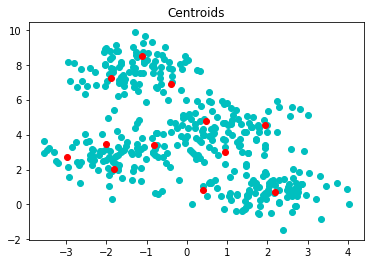

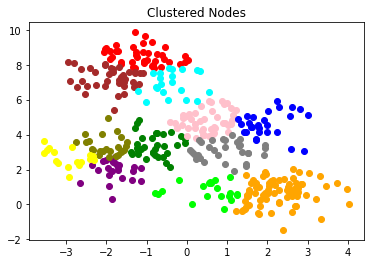

new centroids:
 [[ 2.22973119  0.70023321]
 [-0.81158216  3.37908178]
 [-1.11708313  8.50436079]
 [-1.78725375  1.92838473]
 [-1.89329992  7.22355458]
 [ 0.48473864  4.77656941]
 [ 0.94331987  3.08298598]
 [-1.98156113  3.38095223]
 [-0.38709048  6.91986373]
 [ 0.52155266  0.76901619]
 [-2.93238177  2.69061017]
 [ 1.97388189  4.58531061]]


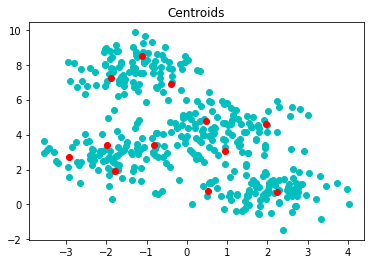

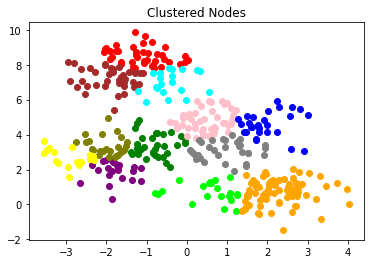

new centroids:
 [[ 2.24304893  0.71409675]
 [-0.81158216  3.37908178]
 [-1.11708313  8.50436079]
 [-1.78714477  1.89242788]
 [-1.89329992  7.22355458]
 [ 0.4796214   4.80105395]
 [ 0.94331987  3.08298598]
 [-1.97388474  3.35449156]
 [-0.41865642  6.96948979]
 [ 0.55469698  0.71556798]
 [-2.93238177  2.69061017]
 [ 1.97388189  4.58531061]]


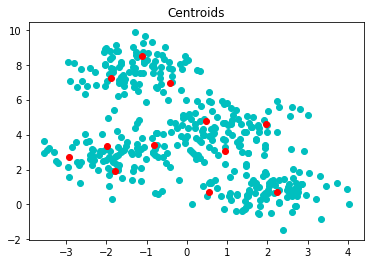

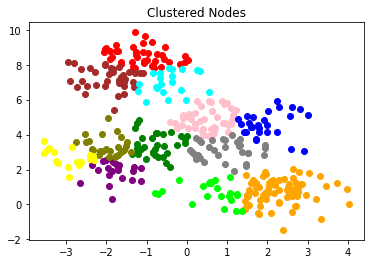

new centroids:
 [[ 2.25477081  0.72826867]
 [-0.76950681  3.40732072]
 [-1.11708313  8.50436079]
 [-1.78714477  1.89242788]
 [-1.91194315  7.23154481]
 [ 0.49567092  4.84235845]
 [ 0.92121901  3.10576033]
 [-1.95133397  3.34084787]
 [-0.45514218  6.9671296 ]
 [ 0.5914793   0.66718776]
 [-2.93238177  2.69061017]
 [ 1.97388189  4.58531061]]


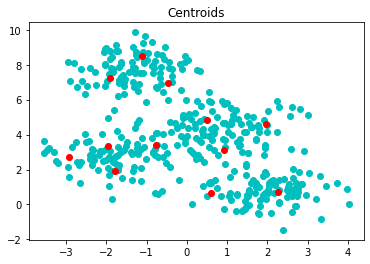

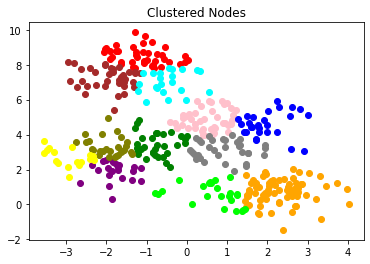

new centroids:
 [[ 2.27758295  0.75647678]
 [-0.75113206  3.42395982]
 [-1.11708313  8.50436079]
 [-1.78714477  1.89242788]
 [-1.93410596  7.22407863]
 [ 0.49459377  4.8630615 ]
 [ 0.90975982  3.13078044]
 [-1.92934007  3.3235894 ]
 [-0.48408658  6.99170524]
 [ 0.66069998  0.58647816]
 [-2.93238177  2.69061017]
 [ 1.97388189  4.58531061]]


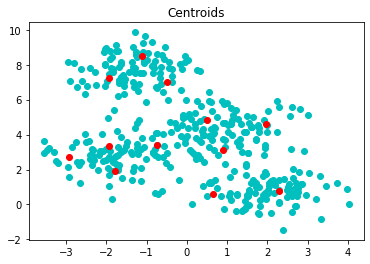

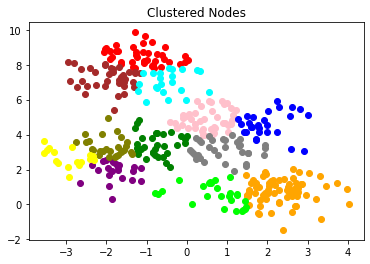

new centroids:
 [[ 2.30069502  0.77676743]
 [-0.75113206  3.42395982]
 [-1.11708313  8.50436079]
 [-1.78714477  1.89242788]
 [-1.93410596  7.22407863]
 [ 0.49459377  4.8630615 ]
 [ 0.90975982  3.13078044]
 [-1.92934007  3.3235894 ]
 [-0.48408658  6.99170524]
 [ 0.72196188  0.5441459 ]
 [-2.93238177  2.69061017]
 [ 1.97388189  4.58531061]]


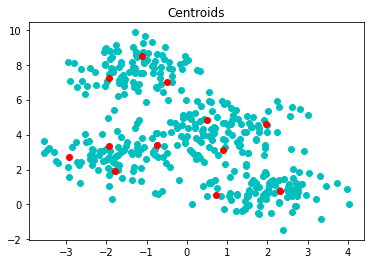

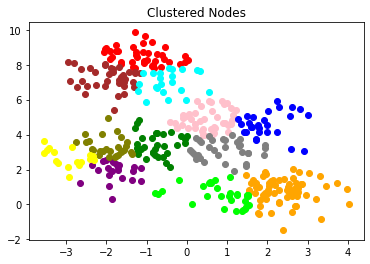

new centroids:
 [[ 2.36009935  0.80503874]
 [-0.75113206  3.42395982]
 [-1.11708313  8.50436079]
 [-1.78714477  1.89242788]
 [-1.93410596  7.22407863]
 [ 0.49459377  4.8630615 ]
 [ 0.90975982  3.13078044]
 [-1.92934007  3.3235894 ]
 [-0.48408658  6.99170524]
 [ 0.85012251  0.52147496]
 [-2.93238177  2.69061017]
 [ 1.97388189  4.58531061]]


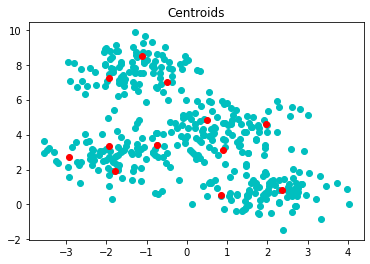

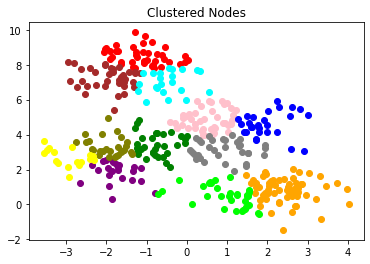

new centroids:
 [[ 2.40521211  0.84818426]
 [-0.75113206  3.42395982]
 [-1.11708313  8.50436079]
 [-1.7439514   1.83887041]
 [-1.93410596  7.22407863]
 [ 0.49459377  4.8630615 ]
 [ 0.90975982  3.13078044]
 [-1.92934007  3.3235894 ]
 [-0.48408658  6.99170524]
 [ 0.99385005  0.47206619]
 [-2.93238177  2.69061017]
 [ 1.97388189  4.58531061]]


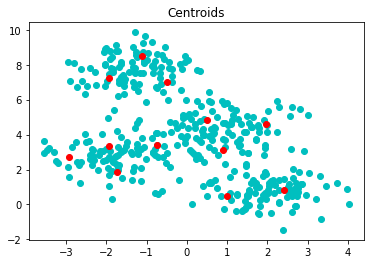

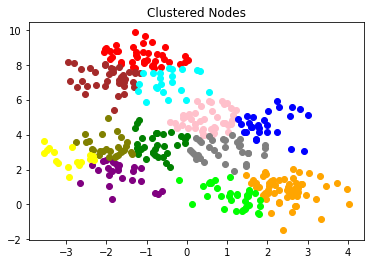

new centroids:
 [[ 2.43741979  0.87692904]
 [-0.75113206  3.42395982]
 [-1.11708313  8.50436079]
 [-1.65786534  1.74503005]
 [-1.93410596  7.22407863]
 [ 0.49459377  4.8630615 ]
 [ 0.90975982  3.13078044]
 [-1.92934007  3.3235894 ]
 [-0.48408658  6.99170524]
 [ 1.15548674  0.44477512]
 [-2.93238177  2.69061017]
 [ 1.97388189  4.58531061]]


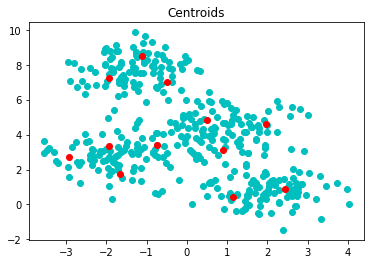

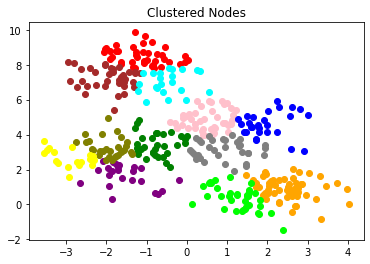

new centroids:
 [[ 2.45948878  0.93673378]
 [-0.75113206  3.42395982]
 [-1.11708313  8.50436079]
 [-1.54158303  1.6407214 ]
 [-1.93410596  7.22407863]
 [ 0.49459377  4.8630615 ]
 [ 0.90975982  3.13078044]
 [-1.92910696  3.26880606]
 [-0.48408658  6.99170524]
 [ 1.26279623  0.36313016]
 [-2.89965682  2.66578363]
 [ 1.97388189  4.58531061]]


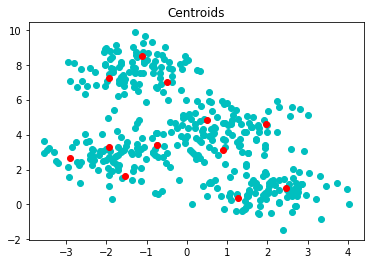

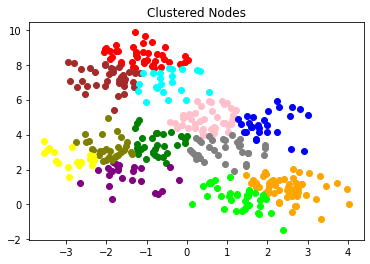

new centroids:
 [[ 2.46322122  0.96048808]
 [-0.76227704  3.46448026]
 [-1.11708313  8.50436079]
 [-1.4684945   1.62711457]
 [-1.93410596  7.22407863]
 [ 0.49459377  4.8630615 ]
 [ 0.90975982  3.13078044]
 [-1.9343592   3.24253863]
 [-0.48408658  6.99170524]
 [ 1.28888593  0.34384377]
 [-2.89965682  2.66578363]
 [ 1.97388189  4.58531061]]


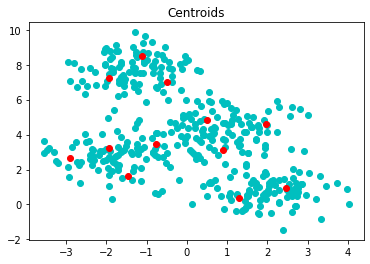

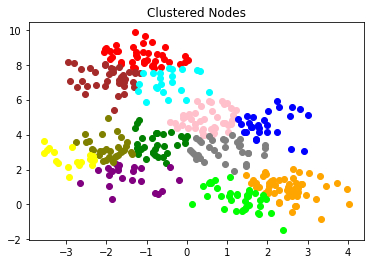

new centroids:
 [[ 2.46322122  0.96048808]
 [-0.76227704  3.46448026]
 [-1.11708313  8.50436079]
 [-1.45241529  1.59090141]
 [-1.93410596  7.22407863]
 [ 0.49459377  4.8630615 ]
 [ 0.90975982  3.13078044]
 [-1.93074235  3.21612784]
 [-0.48408658  6.99170524]
 [ 1.28888593  0.34384377]
 [-2.89965682  2.66578363]
 [ 1.97388189  4.58531061]]


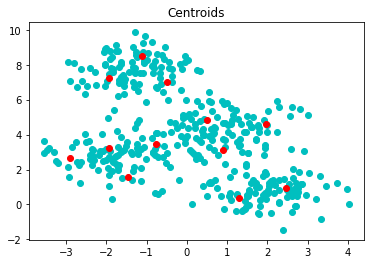

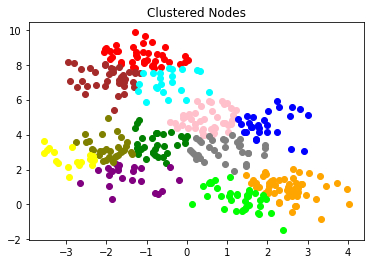

In [ ]:
k_means = K_Means(12, df)
k_means.cluster()

# Applying 13 K-Mean

[[-1.9667952   2.08587688]
 [ 1.71104085  3.67294706]
 [ 0.4370963   3.99545734]
 [-0.40939852  4.69715224]
 [ 2.82891959  1.16729914]
 [ 0.55200984  1.19982318]
 [ 2.54701079  1.19486995]
 [ 1.44360379  0.20661962]
 [-1.33694774  6.99565836]
 [-0.82491123  7.81319661]
 [ 0.91826471  5.76012864]
 [ 2.84733864  1.1866339 ]
 [-1.00438696  5.86295488]]


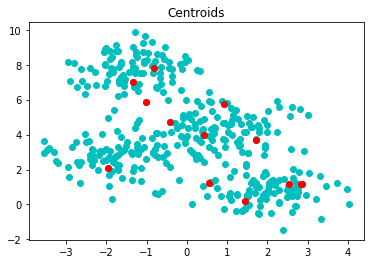

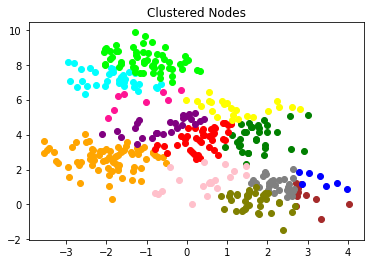

new centroids:
 [[-1.95942431  2.63204081]
 [ 1.7447045   3.84256028]
 [ 0.36386209  3.75319825]
 [-0.55070206  4.499105  ]
 [ 3.00080893  0.43525027]
 [ 0.42181816  1.33366354]
 [ 2.17767092  1.17449841]
 [ 1.64587754  0.16029399]
 [-1.84819523  7.17932091]
 [-1.02618649  8.25857917]
 [ 1.19212424  5.53748892]
 [ 3.30258651  1.37430739]
 [-1.15703661  5.96793305]]


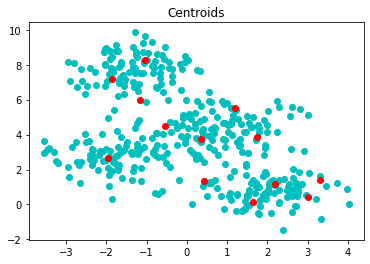

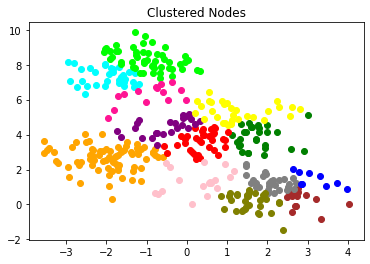

new centroids:
 [[-1.95515182  2.67114166]
 [ 1.74782607  3.83600187]
 [ 0.36133924  3.62511007]
 [-0.51503289  4.46565768]
 [ 2.86192898  0.27279264]
 [ 0.25380641  1.32318622]
 [ 2.03993027  1.28675785]
 [ 1.56911211  0.14653805]
 [-1.95645542  7.31544612]
 [-0.98342024  8.3120825 ]
 [ 1.21343129  5.31049455]
 [ 3.17651535  1.4212982 ]
 [-0.92813392  6.25202083]]


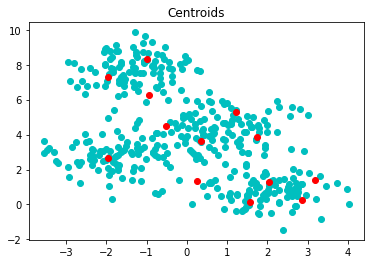

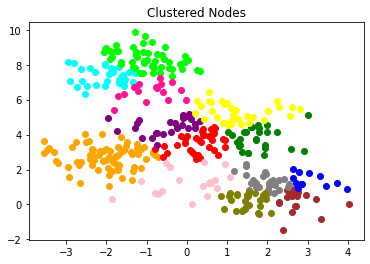

new centroids:
 [[-1.99787561  2.73047233]
 [ 1.74270446  3.7894516 ]
 [ 0.28695279  3.55023579]
 [-0.49949054  4.50295579]
 [ 2.74555593  0.18366917]
 [ 0.02105732  1.24113044]
 [ 1.91307345  1.32003637]
 [ 1.48880288  0.18219221]
 [-2.00091209  7.34657559]
 [-0.9892885   8.33281332]
 [ 1.22780741  5.26857186]
 [ 3.05718785  1.36901227]
 [-0.88800906  6.46429082]]


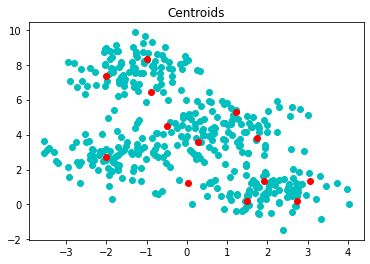

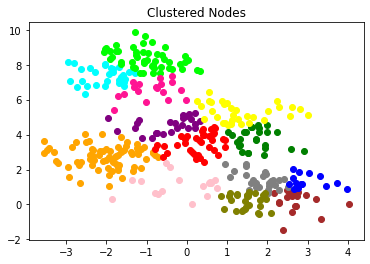

new centroids:
 [[-2.00671979  2.74890176]
 [ 1.6942722   3.73879224]
 [ 0.2631275   3.51580867]
 [-0.46344455  4.57374341]
 [ 2.71927658  0.1684117 ]
 [-0.20043719  1.10014004]
 [ 1.81977323  1.39064508]
 [ 1.48880288  0.18219221]
 [-2.02233029  7.3578955 ]
 [-1.00124055  8.35177436]
 [ 1.31270353  5.26412773]
 [ 2.99158722  1.32313472]
 [-0.88471258  6.54389511]]


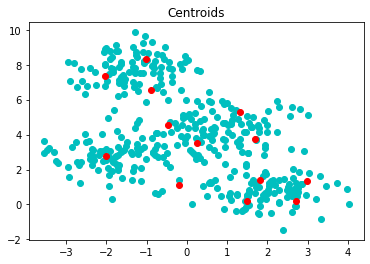

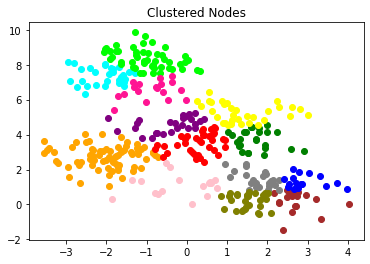

new centroids:
 [[-2.00671979  2.74890176]
 [ 1.69168309  3.7053557 ]
 [ 0.2631275   3.51580867]
 [-0.43013916  4.58504016]
 [ 2.71927658  0.1684117 ]
 [-0.20043719  1.10014004]
 [ 1.76291691  1.43188614]
 [ 1.50710008  0.19845487]
 [-2.02233029  7.3578955 ]
 [-1.00124055  8.35177436]
 [ 1.35280047  5.2549141 ]
 [ 2.92502397  1.310609  ]
 [-0.88471258  6.54389511]]


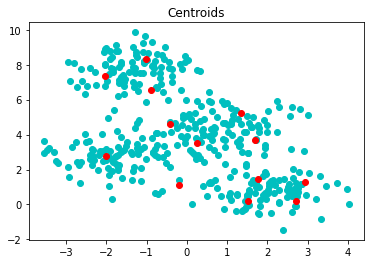

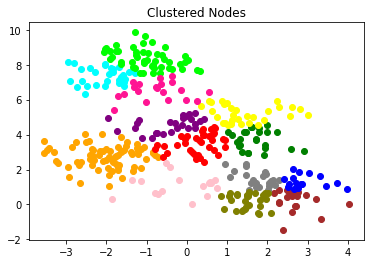

new centroids:
 [[-2.00671979  2.74890176]
 [ 1.69168309  3.7053557 ]
 [ 0.2631275   3.51580867]
 [-0.43013916  4.58504016]
 [ 2.69685167  0.20240245]
 [-0.20043719  1.10014004]
 [ 1.74170545  1.45659216]
 [ 1.50710008  0.19845487]
 [-2.02233029  7.3578955 ]
 [-1.00124055  8.35177436]
 [ 1.41442486  5.19414869]
 [ 2.92502397  1.310609  ]
 [-0.75647908  6.5091834 ]]


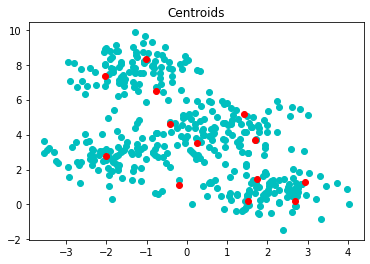

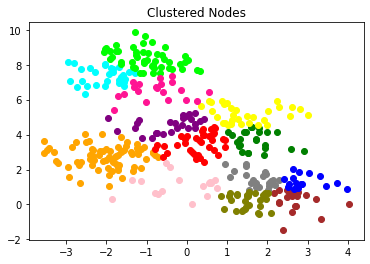

new centroids:
 [[-2.00671979  2.74890176]
 [ 1.67941591  3.669196  ]
 [ 0.2631275   3.51580867]
 [-0.43013916  4.58504016]
 [ 2.69685167  0.20240245]
 [-0.20043719  1.10014004]
 [ 1.74170545  1.45659216]
 [ 1.50710008  0.19845487]
 [-2.02233029  7.3578955 ]
 [-1.00124055  8.35177436]
 [ 1.43228957  5.17474369]
 [ 2.92502397  1.310609  ]
 [-0.75647908  6.5091834 ]]


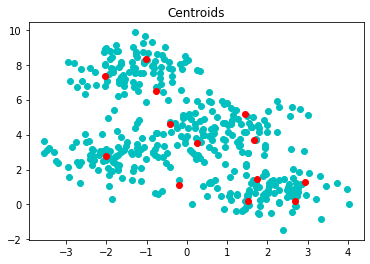

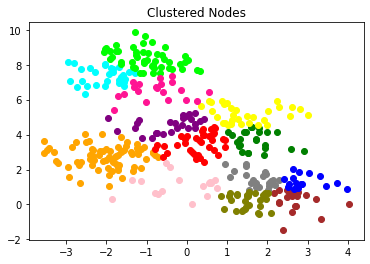

In [ ]:
k_means = K_Means(13, df)
k_means.cluster()

# Applying 14 K-Mean

[[ 0.34764153  5.61534973]
 [ 0.67537525  3.13507873]
 [-1.89910264  8.30787894]
 [-1.02550617  2.60860227]
 [ 0.54208571  3.30024997]
 [-1.67781034  7.1420372 ]
 [ 0.4370963   3.99545734]
 [ 2.6489561   0.90086892]
 [-2.01081926  3.14730096]
 [ 2.78450286  1.86760025]
 [-2.402349    2.6204304 ]
 [ 0.18266417  2.87997615]
 [ 1.15330381  5.13393051]
 [ 2.00288508  0.80645418]]


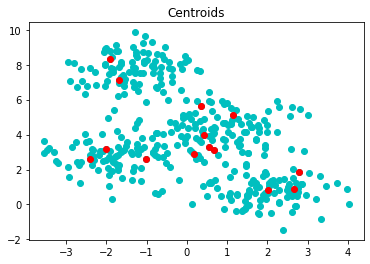

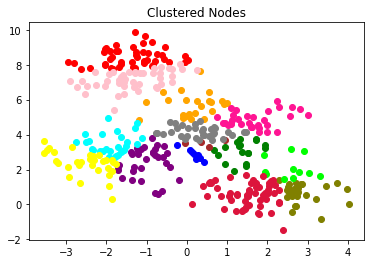

new centroids:
 [[ 0.13023053  5.68124837]
 [ 1.3499868   3.05685466]
 [-1.36525013  8.43245467]
 [-1.0043162   2.41368274]
 [ 0.44670401  3.51943345]
 [-1.35274474  7.14469005]
 [ 0.29054888  4.16202415]
 [ 2.8828      0.63138022]
 [-1.85740924  3.47585901]
 [ 2.5058156   2.06291386]
 [-2.52639441  2.36789579]
 [ 0.17728803  2.85980742]
 [ 1.67494289  4.86955844]
 [ 1.52065772  0.58296751]]


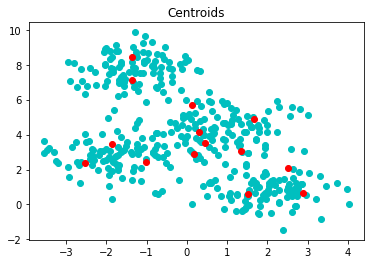

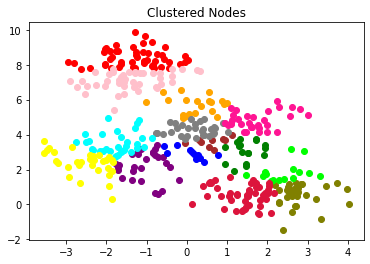

new centroids:
 [[ 0.20051951  5.66957888]
 [ 1.45769125  3.04994927]
 [-1.28986852  8.40220894]
 [-1.0463765   2.22606032]
 [ 0.59999165  3.58900418]
 [-1.40116075  7.10350747]
 [ 0.17281502  4.27961867]
 [ 2.8010189   0.51770456]
 [-1.74457973  3.52417865]
 [ 2.37615875  1.83813243]
 [-2.5317237   2.38141344]
 [ 0.1027116   2.9132726 ]
 [ 1.71527922  4.82588215]
 [ 1.41378508  0.5539025 ]]


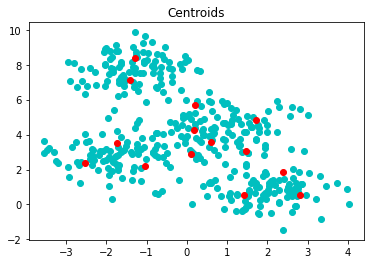

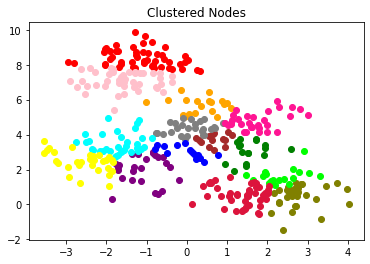

new centroids:
 [[ 0.2994844   5.66066603]
 [ 1.55381292  3.04096599]
 [-1.13032472  8.38539091]
 [-1.09155684  1.99594418]
 [ 0.67862331  3.72480376]
 [-1.57383972  7.07840362]
 [ 0.07661591  4.35839226]
 [ 2.78476795  0.44273224]
 [-1.7109264   3.49904309]
 [ 2.30869794  1.64140658]
 [-2.5541      2.44983853]
 [-0.03209808  3.00797881]
 [ 1.73583163  4.80208089]
 [ 1.36384484  0.54205487]]


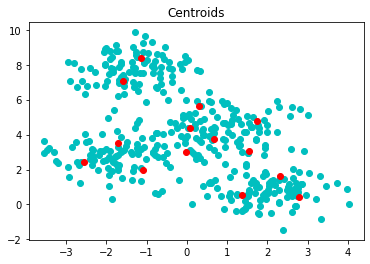

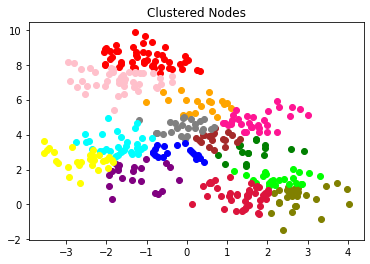

new centroids:
 [[ 0.27317865  5.73074631]
 [ 1.64736421  3.02452517]
 [-1.05293013  8.37846571]
 [-1.26969567  1.65197391]
 [ 0.71655736  3.77852156]
 [-1.67579389  7.13102804]
 [-0.0712028   4.42504623]
 [ 2.78365696  0.35710728]
 [-1.68256439  3.43386699]
 [ 2.23714302  1.48617272]
 [-2.61573598  2.56867435]
 [-0.27736118  2.96626155]
 [ 1.70849945  4.79726525]
 [ 1.33297623  0.4972311 ]]


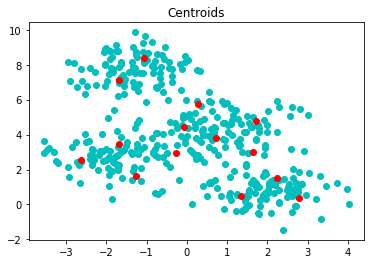

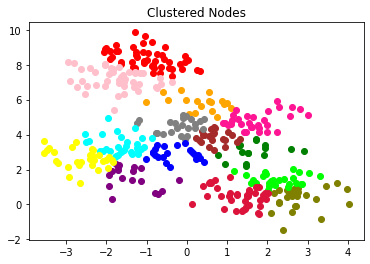

new centroids:
 [[ 0.31007347  5.80098121]
 [ 1.64736421  3.02452517]
 [-0.98401405  8.36570629]
 [-1.37276294  1.52968108]
 [ 0.69409498  3.85108346]
 [-1.73852589  7.17292602]
 [-0.19670632  4.50425902]
 [ 2.79498024  0.33247868]
 [-1.64063072  3.39780955]
 [ 2.19900513  1.4212332 ]
 [-2.61164696  2.62354981]
 [-0.33077987  2.8833286 ]
 [ 1.70849945  4.79726525]
 [ 1.29939949  0.45730788]]


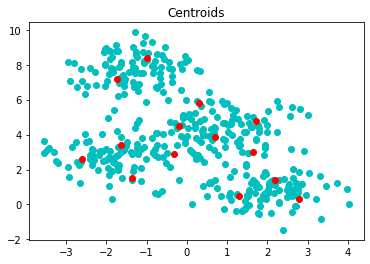

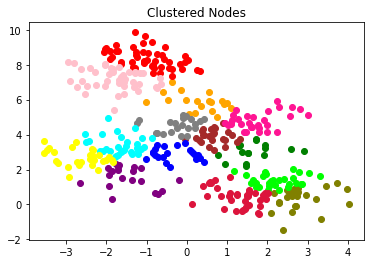

new centroids:
 [[ 0.27433237  5.86349164]
 [ 1.64736421  3.02452517]
 [-0.98401405  8.36570629]
 [-1.46679061  1.54323438]
 [ 0.66051395  3.89882372]
 [-1.76965131  7.17711344]
 [-0.23068985  4.54582981]
 [ 2.81588761  0.31240546]
 [-1.64063072  3.39780955]
 [ 2.17448394  1.37463484]
 [-2.63297606  2.69200236]
 [-0.33077987  2.8833286 ]
 [ 1.73583163  4.80208089]
 [ 1.27518015  0.42984207]]


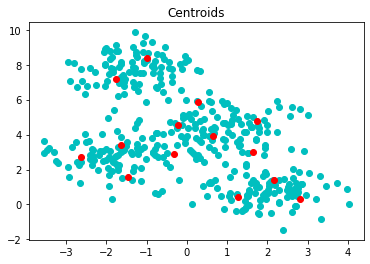

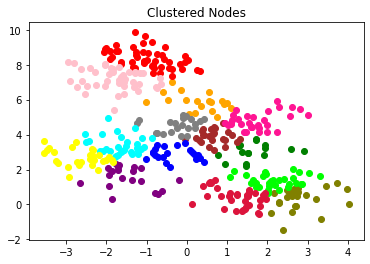

new centroids:
 [[ 0.27433237  5.86349164]
 [ 1.64736421  3.02452517]
 [-0.98401405  8.36570629]
 [-1.46679061  1.54323438]
 [ 0.66051395  3.89882372]
 [-1.76965131  7.17711344]
 [-0.23068985  4.54582981]
 [ 2.81588761  0.31240546]
 [-1.64063072  3.39780955]
 [ 2.13751237  1.35893548]
 [-2.63297606  2.69200236]
 [-0.33077987  2.8833286 ]
 [ 1.73583163  4.80208089]
 [ 1.26013643  0.39218075]]


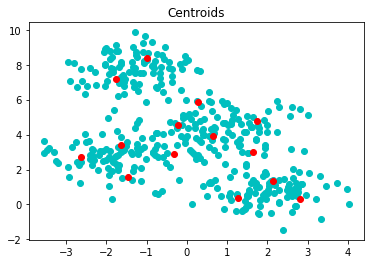

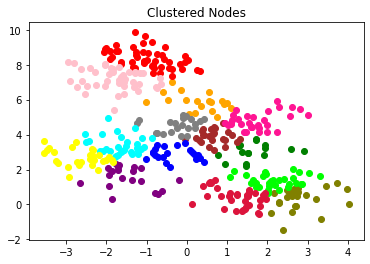

In [ ]:
k_means = K_Means(14, df)
k_means.cluster()

# Applying 15 K-Mean

[[-1.15038008  7.51318459]
 [-0.20502888  1.41303526]
 [ 2.49817267  0.40824389]
 [-1.22789092  3.24023246]
 [-1.56335418  7.03168659]
 [-0.72580611  2.69042673]
 [ 1.24271427  0.60357915]
 [ 3.71779298  1.22924298]
 [ 2.29865966  1.41518092]
 [ 2.6489561   0.90086892]
 [ 0.95559287  3.67646105]
 [ 1.09870711  5.53991981]
 [ 2.7706541   0.68562387]
 [ 2.04080017  1.21994264]
 [ 2.24623729  4.1294028 ]]


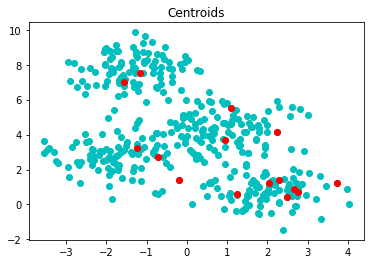

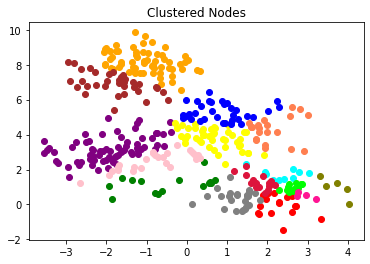

new centroids:
 [[-1.04329909  8.17281346]
 [-0.46456086  1.17661831]
 [ 2.29022298 -0.07558739]
 [-1.91168206  3.17683857]
 [-1.79680876  6.93741251]
 [-0.8237244   2.48567521]
 [ 1.24715639  0.34754901]
 [ 3.69302229  0.94944567]
 [ 2.29772902  1.74614757]
 [ 2.61617555  0.96858041]
 [ 0.67723059  3.80713323]
 [ 0.80654834  5.27713566]
 [ 2.91823012  0.50268722]
 [ 1.77446067  1.2810819 ]
 [ 2.09901779  4.28908258]]


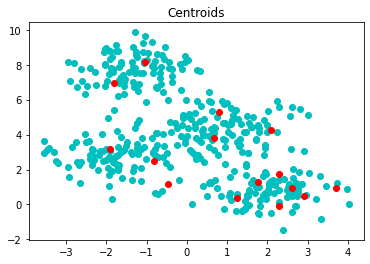

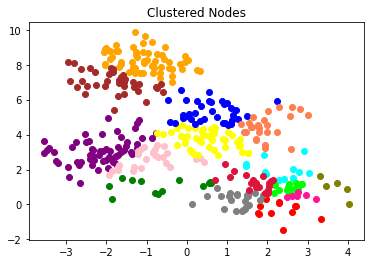

new centroids:
 [[-1.03757995  8.23465109]
 [-0.6236444   1.06299184]
 [ 2.31044694 -0.33678058]
 [-2.12388702  3.07477614]
 [-1.80474115  7.00740476]
 [-0.91286032  2.60734537]
 [ 1.26793461  0.28734609]
 [ 3.69302229  0.94944567]
 [ 2.26388636  1.99242218]
 [ 2.54939668  0.95197204]
 [ 0.4846335   3.7264418 ]
 [ 0.56378928  5.27876872]
 [ 2.79879772  0.48750743]
 [ 1.66398411  1.26976185]
 [ 1.96996869  4.45874041]]


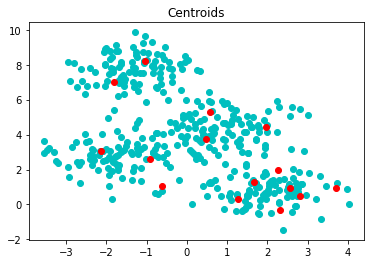

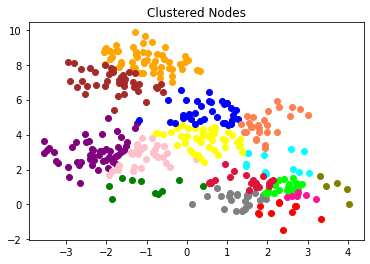

new centroids:
 [[-1.00858446  8.26312791]
 [-0.98340251  1.01112607]
 [ 2.34277593 -0.39644356]
 [-2.27216724  2.98974948]
 [-1.78852264  7.05886876]
 [-1.05090805  2.75776144]
 [ 1.29435359  0.28858325]
 [ 3.69302229  0.94944567]
 [ 2.12894207  2.35035974]
 [ 2.44558449  0.99246624]
 [ 0.40810557  3.71677059]
 [ 0.44241417  5.25474582]
 [ 2.79879772  0.48750743]
 [ 1.46217564  1.346087  ]
 [ 1.93891504  4.58897209]]


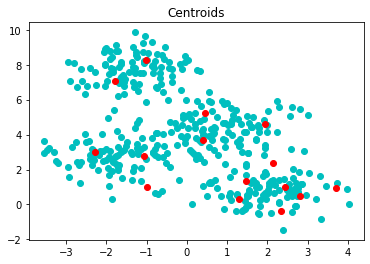

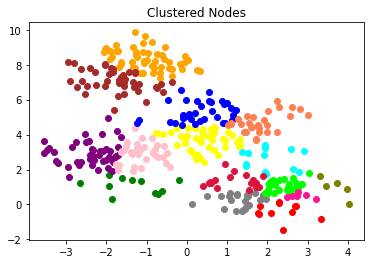

new centroids:
 [[-0.99617949  8.30359225]
 [-1.34786013  1.09192714]
 [ 2.34277593 -0.39644356]
 [-2.38944201  2.92605533]
 [-1.74968668  7.09207116]
 [-1.1393695   2.91602555]
 [ 1.31630413  0.26206912]
 [ 3.69302229  0.94944567]
 [ 1.9928168   2.55848988]
 [ 2.40913602  1.06821635]
 [ 0.39433519  3.69028437]
 [ 0.29592071  5.28239508]
 [ 2.79879772  0.48750743]
 [ 1.23906833  1.33223128]
 [ 1.82275827  4.69318608]]


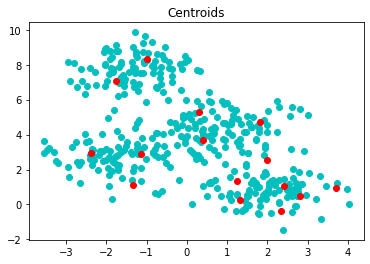

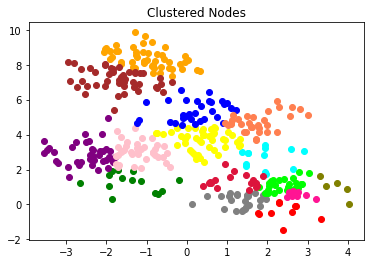

new centroids:
 [[-0.98401405  8.36570629]
 [-1.41059071  1.27361566]
 [ 2.39428412 -0.42997332]
 [-2.49054208  2.8914561 ]
 [-1.71358979  7.15662548]
 [-1.19341772  3.03018883]
 [ 1.33597297  0.24963777]
 [ 3.69302229  0.94944567]
 [ 1.9362678   2.60783914]
 [ 2.38384761  1.12561793]
 [ 0.39433519  3.69028437]
 [ 0.18229236  5.33809449]
 [ 2.74690316  0.54943258]
 [ 1.20840467  1.35177447]
 [ 1.75034817  4.71143787]]


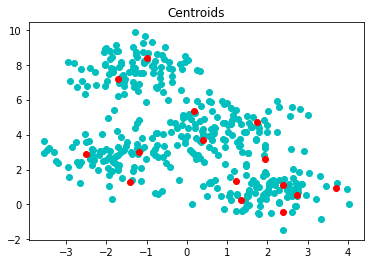

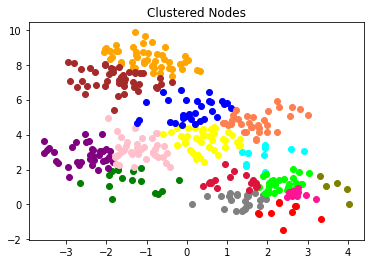

new centroids:
 [[-0.98401405  8.36570629]
 [-1.4126556   1.37939664]
 [ 2.39428412 -0.42997332]
 [-2.52397815  2.83996985]
 [-1.73852589  7.17292602]
 [-1.19340523  3.17000786]
 [ 1.33597297  0.24963777]
 [ 3.69302229  0.94944567]
 [ 1.87540235  2.72839205]
 [ 2.34411745  1.21084381]
 [ 0.44748114  3.67111242]
 [ 0.10076077  5.39219721]
 [ 2.74698163  0.59369012]
 [ 1.16893439  1.33447793]
 [ 1.70845757  4.73147229]]


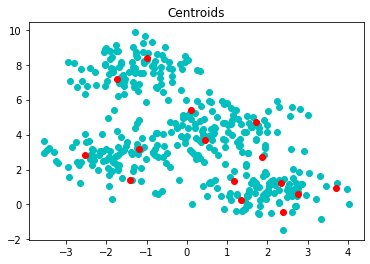

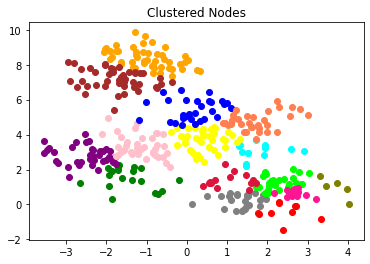

new centroids:
 [[-0.98401405  8.36570629]
 [-1.45129411  1.50263548]
 [ 2.39428412 -0.42997332]
 [-2.50994718  2.81097312]
 [-1.73852589  7.17292602]
 [-1.15676293  3.33462656]
 [ 1.33597297  0.24963777]
 [ 3.69302229  0.94944567]
 [ 1.76489578  3.03691278]
 [ 2.25933152  1.29045748]
 [ 0.4306061   3.67731628]
 [ 0.14541398  5.41741148]
 [ 2.66855554  0.63910748]
 [ 1.09323246  1.37849335]
 [ 1.70837684  4.7645512 ]]


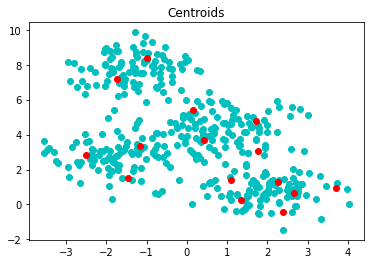

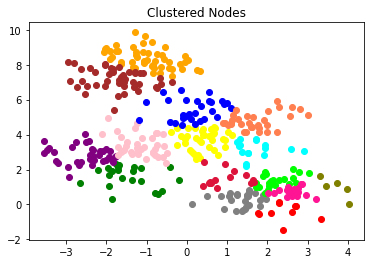

new centroids:
 [[-0.98401405  8.36570629]
 [-1.45241529  1.59090141]
 [ 2.39428412 -0.42997332]
 [-2.51790105  2.84686248]
 [-1.73852589  7.17292602]
 [-1.16104903  3.38161176]
 [ 1.34384066  0.27198384]
 [ 3.69302229  0.94944567]
 [ 1.70055371  3.15811165]
 [ 2.18383602  1.3591201 ]
 [ 0.38471382  3.71295276]
 [ 0.14541398  5.41741148]
 [ 2.61836028  0.7331818 ]
 [ 0.96882464  1.50186445]
 [ 1.70849945  4.79726525]]


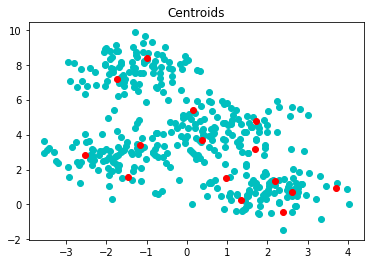

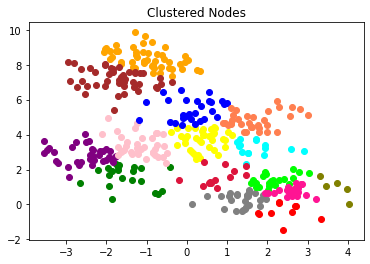

new centroids:
 [[-0.98401405  8.36570629]
 [-1.51181464  1.59937123]
 [ 2.39428412 -0.42997332]
 [-2.51790105  2.84686248]
 [-1.73852589  7.17292602]
 [-1.16104903  3.38161176]
 [ 1.34384066  0.27198384]
 [ 3.69302229  0.94944567]
 [ 1.71612228  3.22174682]
 [ 2.10339935  1.39157941]
 [ 0.38471382  3.71295276]
 [ 0.1125418   5.41318705]
 [ 2.58744079  0.75311287]
 [ 0.76330268  1.58919419]
 [ 1.68944344  4.82047321]]


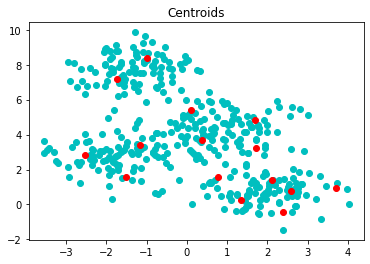

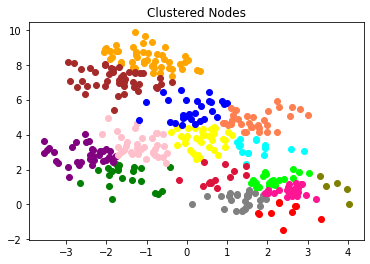

new centroids:
 [[-0.98401405  8.36570629]
 [-1.51181464  1.59937123]
 [ 2.39428412 -0.42997332]
 [-2.51790105  2.84686248]
 [-1.73852589  7.17292602]
 [-1.16104903  3.38161176]
 [ 1.34384066  0.27198384]
 [ 3.69302229  0.94944567]
 [ 1.71612228  3.22174682]
 [ 2.08780403  1.42711735]
 [ 0.38471382  3.71295276]
 [ 0.1125418   5.41318705]
 [ 2.55767957  0.77668899]
 [ 0.76330268  1.58919419]
 [ 1.68944344  4.82047321]]


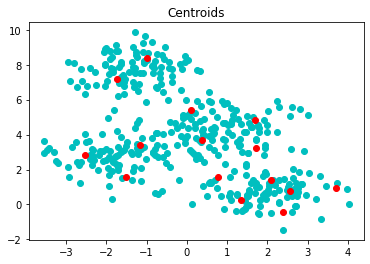

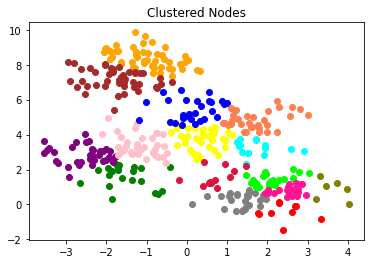

new centroids:
 [[-0.98401405  8.36570629]
 [-1.51181464  1.59937123]
 [ 2.39428412 -0.42997332]
 [-2.51790105  2.84686248]
 [-1.73852589  7.17292602]
 [-1.16104903  3.38161176]
 [ 1.34384066  0.27198384]
 [ 3.61337184  0.84314336]
 [ 1.71612228  3.22174682]
 [ 2.06034613  1.43895726]
 [ 0.38471382  3.71295276]
 [ 0.1125418   5.41318705]
 [ 2.52480757  0.79994184]
 [ 0.70555522  1.58000743]
 [ 1.68944344  4.82047321]]


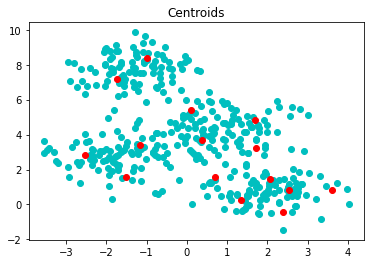

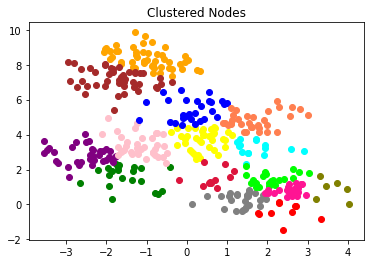

new centroids:
 [[-0.98401405  8.36570629]
 [-1.51181464  1.59937123]
 [ 2.39428412 -0.42997332]
 [-2.51790105  2.84686248]
 [-1.73852589  7.17292602]
 [-1.16104903  3.38161176]
 [ 1.34384066  0.27198384]
 [ 3.61337184  0.84314336]
 [ 1.71612228  3.22174682]
 [ 2.03562442  1.47081671]
 [ 0.38471382  3.71295276]
 [ 0.1125418   5.41318705]
 [ 2.52480757  0.79994184]
 [ 0.63633068  1.52331864]
 [ 1.68944344  4.82047321]]


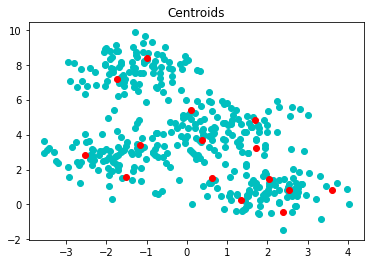

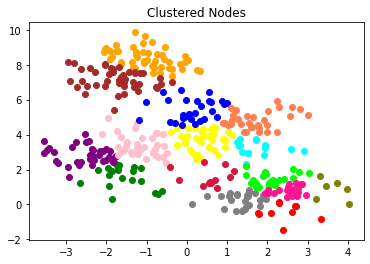

new centroids:
 [[-0.98401405  8.36570629]
 [-1.56712349  1.57094848]
 [ 2.39428412 -0.42997332]
 [-2.51790105  2.84686248]
 [-1.73852589  7.17292602]
 [-1.16104903  3.38161176]
 [ 1.34384066  0.27198384]
 [ 3.61337184  0.84314336]
 [ 1.71612228  3.22174682]
 [ 2.03562442  1.47081671]
 [ 0.38471382  3.71295276]
 [ 0.1125418   5.41318705]
 [ 2.52480757  0.79994184]
 [ 0.54949998  1.57702761]
 [ 1.68944344  4.82047321]]


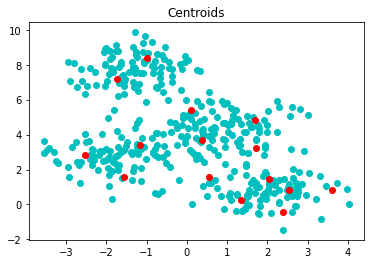

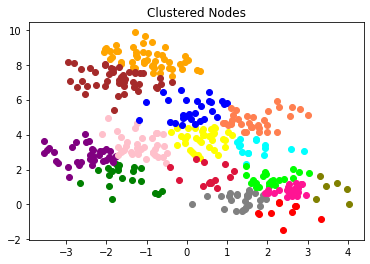

new centroids:
 [[-0.98401405  8.36570629]
 [-1.56712349  1.57094848]
 [ 2.39428412 -0.42997332]
 [-2.51790105  2.84686248]
 [-1.73852589  7.17292602]
 [-1.16104903  3.38161176]
 [ 1.34384066  0.27198384]
 [ 3.61337184  0.84314336]
 [ 1.71612228  3.22174682]
 [ 2.03562442  1.47081671]
 [ 0.38924331  3.74330949]
 [ 0.1125418   5.41318705]
 [ 2.52480757  0.79994184]
 [ 0.52428092  1.65726474]
 [ 1.68944344  4.82047321]]


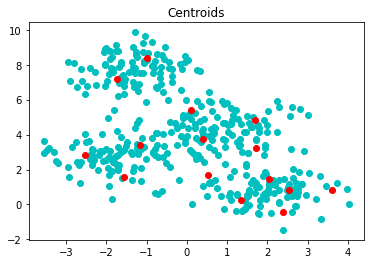

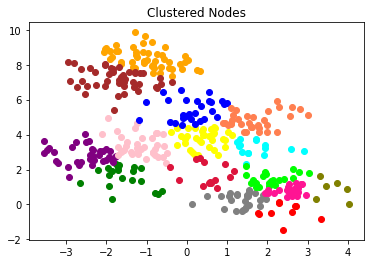

new centroids:
 [[-0.98401405  8.36570629]
 [-1.56712349  1.57094848]
 [ 2.39428412 -0.42997332]
 [-2.51790105  2.84686248]
 [-1.73852589  7.17292602]
 [-1.16104903  3.38161176]
 [ 1.34384066  0.27198384]
 [ 3.61337184  0.84314336]
 [ 1.71612228  3.22174682]
 [ 2.03562442  1.47081671]
 [ 0.39095924  3.77447597]
 [ 0.1125418   5.41318705]
 [ 2.52480757  0.79994184]
 [ 0.51034555  1.72835173]
 [ 1.68944344  4.82047321]]


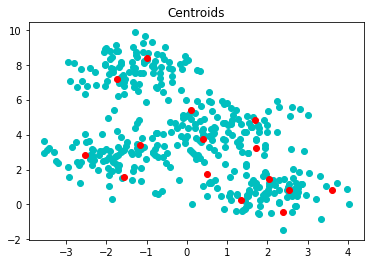

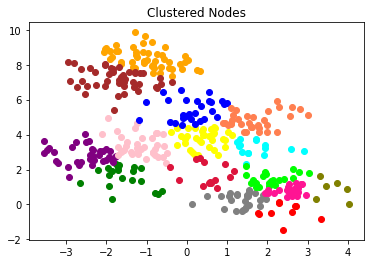

In [ ]:
k_means = K_Means(15, df)
k_means.cluster()

# Applying 16 K-Mean

[[-1.92372273  1.71351207]
 [ 1.15330381  5.13393051]
 [-1.43887587  7.57854774]
 [-1.68419963  2.23138105]
 [-1.02550617  2.60860227]
 [-2.04112646  8.89228149]
 [ 0.87436456  5.92693661]
 [ 0.55200984  1.19982318]
 [-1.7588147   9.15486672]
 [ 2.60208482 -0.43736624]
 [-1.71351389  1.99645113]
 [ 1.78143425  4.17202875]
 [-1.93092595  7.44077298]
 [-2.47645494  6.80649847]
 [ 1.79101428  0.9804538 ]
 [ 1.51344605  0.55998262]]


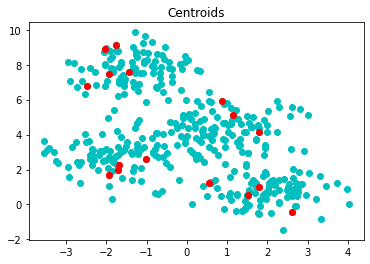

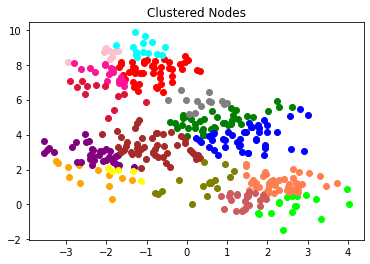

new centroids:
 [[-2.37770765  1.67041174]
 [ 0.72095895  4.78608283]
 [-0.84324644  7.63947952]
 [-2.32934555  2.87020442]
 [-0.85090402  3.31048216]
 [-2.01861885  8.63778978]
 [ 0.36126389  5.86638037]
 [ 0.34355533  1.2042976 ]
 [-1.07698087  8.96320309]
 [ 2.70319119 -0.07070101]
 [-1.60595862  1.85358008]
 [ 1.45485917  3.84625432]
 [-1.96358995  7.48522672]
 [-2.13073757  6.36930381]
 [ 2.26760485  1.25379434]
 [ 1.42119171  0.24877765]]


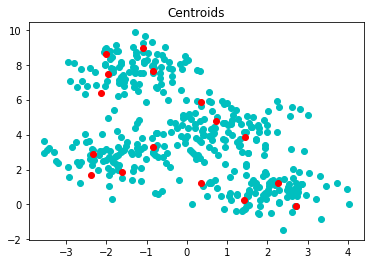

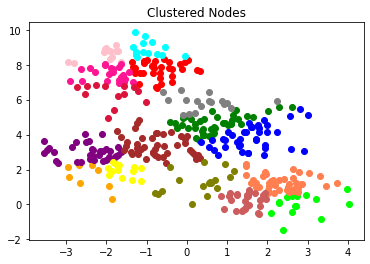

new centroids:
 [[-2.44292499  1.60612499]
 [ 0.68343057  4.65054221]
 [-0.70844165  7.71549002]
 [-2.40797189  3.00067236]
 [-0.75221954  3.37457242]
 [-2.02993729  8.59722775]
 [ 0.43184205  5.83935493]
 [ 0.29948515  1.26097576]
 [-0.95483407  8.91666927]
 [ 2.82711955 -0.01324255]
 [-1.59845819  1.94737495]
 [ 1.58030168  3.83659451]
 [-1.90116151  7.45886642]
 [-1.85722738  6.33094052]
 [ 2.29189532  1.27728425]
 [ 1.46952777  0.23088955]]


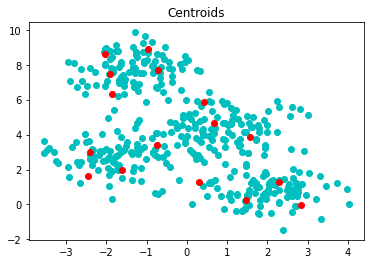

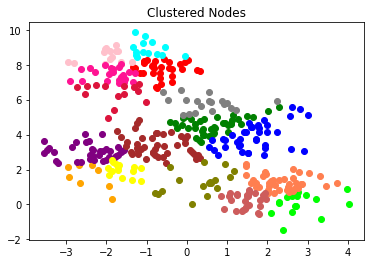

new centroids:
 [[-2.44292499  1.60612499]
 [ 0.62410644  4.5544503 ]
 [-0.65478492  7.73249349]
 [-2.39996911  3.01635825]
 [-0.73330017  3.38083424]
 [-1.98201325  8.52830876]
 [ 0.48445563  5.79174288]
 [ 0.29948515  1.26097576]
 [-0.95483407  8.91666927]
 [ 2.82359046  0.0304366 ]
 [-1.61548448  1.98692473]
 [ 1.65484587  3.88008987]
 [-1.86935912  7.435077  ]
 [-1.80920095  6.37301089]
 [ 2.2804963   1.2913714 ]
 [ 1.46952777  0.23088955]]


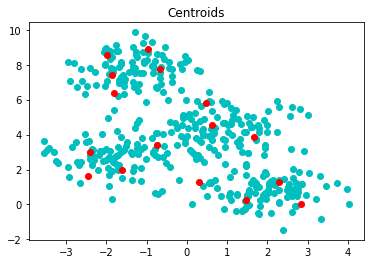

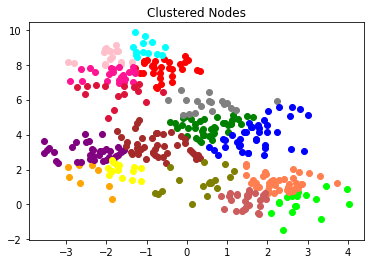

new centroids:
 [[-2.44292499  1.60612499]
 [ 0.53445927  4.47448783]
 [-0.59255239  7.75889642]
 [-2.39996911  3.01635825]
 [-0.75078164  3.36771981]
 [-1.96309694  8.46605739]
 [ 0.54422901  5.7566674 ]
 [ 0.29948515  1.26097576]
 [-1.02453211  8.94845974]
 [ 2.86080174  0.08966135]
 [-1.61548448  1.98692473]
 [ 1.70668201  3.96547479]
 [-1.82463683  7.4071118 ]
 [-1.72801856  6.37635027]
 [ 2.25182103  1.2975693 ]
 [ 1.46952777  0.23088955]]


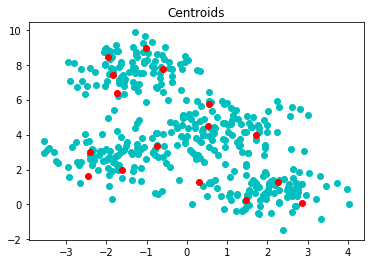

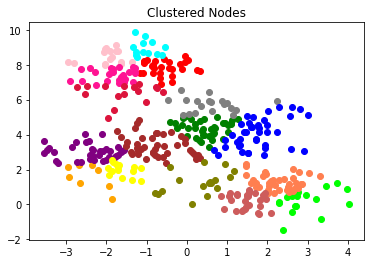

new centroids:
 [[-2.44292499  1.60612499]
 [ 0.45410549  4.3764439 ]
 [-0.55629246  7.83045457]
 [-2.39996911  3.01635825]
 [-0.75078164  3.36771981]
 [-1.96309694  8.46605739]
 [ 0.57628558  5.72389178]
 [ 0.29948515  1.26097576]
 [-1.02453211  8.94845974]
 [ 2.95666582  0.19200177]
 [-1.61548448  1.98692473]
 [ 1.74025027  4.05730689]
 [-1.82047425  7.40256589]
 [-1.57300026  6.3886087 ]
 [ 2.21517173  1.29927746]
 [ 1.49085797  0.20532287]]


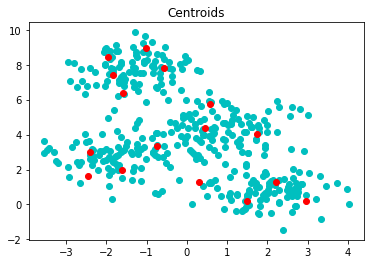

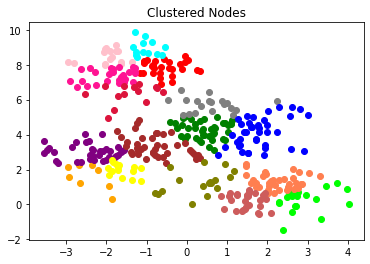

new centroids:
 [[-2.44292499  1.60612499]
 [ 0.42549493  4.29197703]
 [-0.55629246  7.83045457]
 [-2.39996911  3.01635825]
 [-0.78354289  3.34424186]
 [-1.96309694  8.46605739]
 [ 0.57628558  5.72389178]
 [ 0.29948515  1.26097576]
 [-1.02453211  8.94845974]
 [ 2.91819779  0.24918138]
 [-1.61548448  1.98692473]
 [ 1.7758519   4.11243872]
 [-1.87842851  7.35549442]
 [-1.42587791  6.33453836]
 [ 2.19537975  1.32896533]
 [ 1.49085797  0.20532287]]


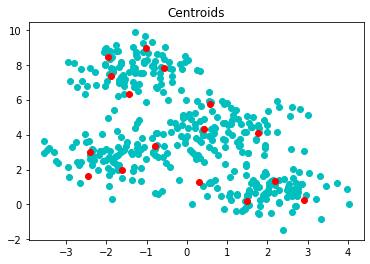

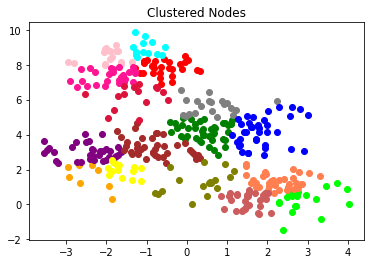

new centroids:
 [[-2.44292499  1.60612499]
 [ 0.42903838  4.19759494]
 [-0.58179855  7.83058658]
 [-2.42380387  3.01381666]
 [-0.80302958  3.27929915]
 [-1.96309694  8.46605739]
 [ 0.60789227  5.64236812]
 [ 0.29948515  1.26097576]
 [-1.02453211  8.94845974]
 [ 2.91819779  0.24918138]
 [-1.61548448  1.98692473]
 [ 1.82568806  4.1680853 ]
 [-1.90602543  7.31577476]
 [-1.30593574  6.18286631]
 [ 2.20013537  1.34721278]
 [ 1.50847676  0.22027243]]


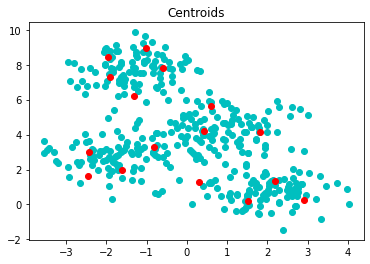

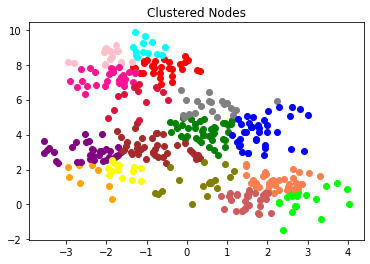

new centroids:
 [[-2.44292499  1.60612499]
 [ 0.44080953  4.17797825]
 [-0.60689521  7.83129527]
 [-2.44803501  3.01178094]
 [-0.82295247  3.27439245]
 [-1.96309694  8.46605739]
 [ 0.57583311  5.61280278]
 [ 0.29948515  1.26097576]
 [-1.02453211  8.94845974]
 [ 2.91819779  0.24918138]
 [-1.61548448  1.98692473]
 [ 1.82568806  4.1680853 ]
 [-1.93644328  7.24256098]
 [-1.1920471   6.12502756]
 [ 2.20013537  1.34721278]
 [ 1.50847676  0.22027243]]


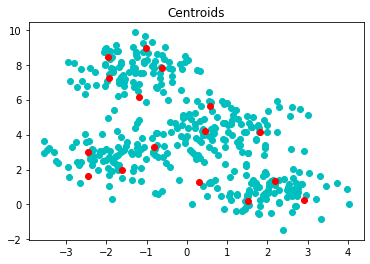

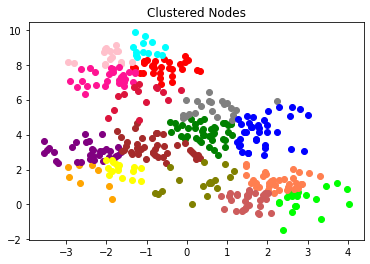

new centroids:
 [[-2.44292499  1.60612499]
 [ 0.45394503  4.13729614]
 [-0.60689521  7.83129527]
 [-2.4616704   3.02674884]
 [-0.82295247  3.27439245]
 [-1.96309694  8.46605739]
 [ 0.60350006  5.50557114]
 [ 0.29948515  1.26097576]
 [-1.02453211  8.94845974]
 [ 2.91819779  0.24918138]
 [-1.6393959   2.02010695]
 [ 1.84509377  4.17380229]
 [-1.93644328  7.24256098]
 [-1.11798441  6.15570498]
 [ 2.20013537  1.34721278]
 [ 1.50847676  0.22027243]]


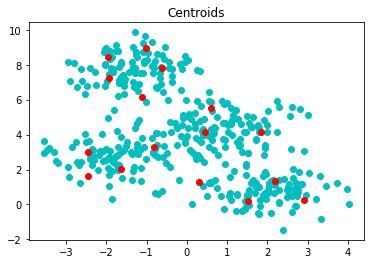

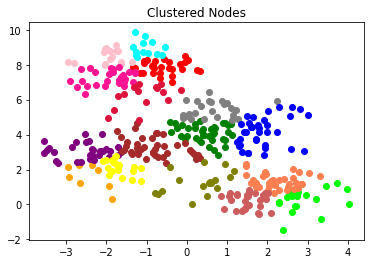

new centroids:
 [[-2.44292499  1.60612499]
 [ 0.4635585   4.09916009]
 [-0.6058823   7.86347822]
 [-2.5203165   3.06398395]
 [-0.82295247  3.27439245]
 [-1.96309694  8.46605739]
 [ 0.6035659   5.43155352]
 [ 0.29948515  1.26097576]
 [-1.02453211  8.94845974]
 [ 2.91819779  0.24918138]
 [-1.6766296   2.12025812]
 [ 1.86126269  4.1529288 ]
 [-1.93644328  7.24256098]
 [-1.08587009  6.20519063]
 [ 2.20013537  1.34721278]
 [ 1.50847676  0.22027243]]


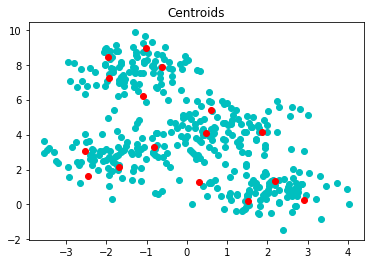

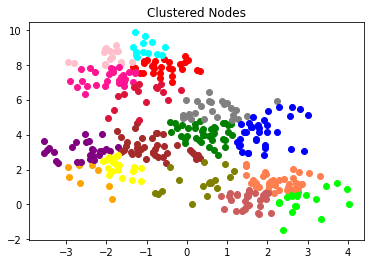

new centroids:
 [[-2.44292499  1.60612499]
 [ 0.45061726  4.08417379]
 [-0.6058823   7.86347822]
 [-2.60541489  3.08754199]
 [-0.86253756  3.26184331]
 [-1.96309694  8.46605739]
 [ 0.63797634  5.41832696]
 [ 0.29948515  1.26097576]
 [-1.02453211  8.94845974]
 [ 2.91819779  0.24918138]
 [-1.68960765  2.18300223]
 [ 1.8719399   4.12543662]
 [-1.93644328  7.24256098]
 [-1.08587009  6.20519063]
 [ 2.20013537  1.34721278]
 [ 1.50847676  0.22027243]]


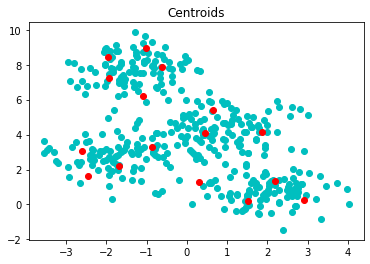

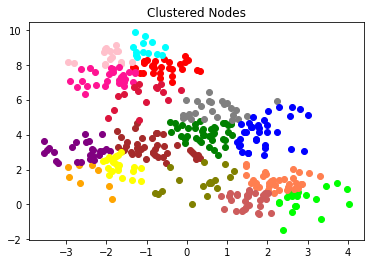

new centroids:
 [[-2.44292499  1.60612499]
 [ 0.45061726  4.08417379]
 [-0.6058823   7.86347822]
 [-2.63980349  3.07950643]
 [-0.86438297  3.26931141]
 [-1.96309694  8.46605739]
 [ 0.63797634  5.41832696]
 [ 0.29948515  1.26097576]
 [-1.02453211  8.94845974]
 [ 2.91819779  0.24918138]
 [-1.68723889  2.22003588]
 [ 1.8719399   4.12543662]
 [-1.93644328  7.24256098]
 [-1.08587009  6.20519063]
 [ 2.20013537  1.34721278]
 [ 1.50847676  0.22027243]]


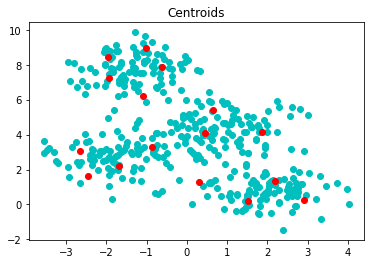

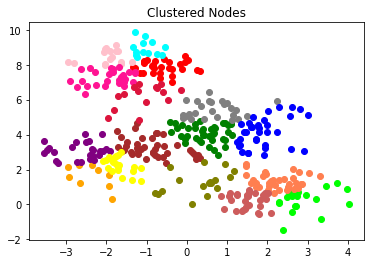

new centroids:
 [[-2.38523585  1.61805689]
 [ 0.45061726  4.08417379]
 [-0.6058823   7.86347822]
 [-2.63980349  3.07950643]
 [-0.86438297  3.26931141]
 [-1.96309694  8.46605739]
 [ 0.63797634  5.41832696]
 [ 0.29948515  1.26097576]
 [-1.02453211  8.94845974]
 [ 2.91819779  0.24918138]
 [-1.67597776  2.24415606]
 [ 1.8719399   4.12543662]
 [-1.93644328  7.24256098]
 [-1.08587009  6.20519063]
 [ 2.20013537  1.34721278]
 [ 1.50847676  0.22027243]]


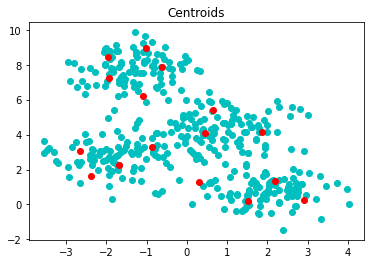

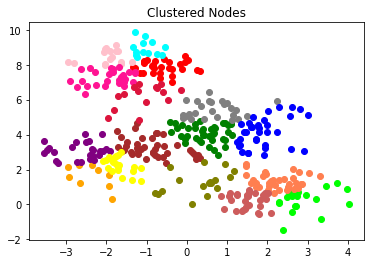

In [ ]:
k_means = K_Means(16, df)
k_means.cluster()